# Universidade de Brasília
## Programa de Pós-Graduação em Computação Aplicada
## Mestrato Profissional em Computação Aplicada
### Mineração de Dados
#### Professor: Marcelo Ladeira
#### Alunos: 
##### 22000xxxx - Alisson Melo Rios
##### 220005401 - Filipe Oliveira da Silva
##### 220005559 - Luís Eduardo Barreiro de Jesus


## 1. PREPARAÇÃO DO AMBIENTE DE PROCESSAMENTO

In [1]:
# Preparação do Ambiente
## Seção de bibliotecas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.frequent_patterns import apriori, association_rules

import datetime 

import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster

from apyori import apriori

In [2]:
# Exportar dataframe para arquivo 
#dftc = pd.read_csv("mycsv.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",") # parse_dates=True
#dftc = pd.read_csv("mycsv.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",") # parse_dates=True
dftc = pd.read_csv("csv_tudo.csv", decimal=".", dtype={'anomes_nr': 'str'}, sep=",", encoding='Latin1') # parse_dates=True
    #dtype={'br': 'str', 'id': 'int64'}
#mycsv = dftc.to_csv(r'/Users/luisjesus/desenv/MPCA/MPCA_MD/mycsv.csv', sep=',', na_rep='', header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', chunksize=None, date_format='%Y%m%d', doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

In [3]:
dftc = dftc.drop(columns=['Unnamed: 0'])
dftc

id  data_inversa     dia_semana  uf      br     km  \
0          1720      20170107         SÁBADO  MG  BR-040  493.9   
1          2339      20170109  SEGUNDA-FEIRA  GO  BR-040    8.9   
2          2363      20170109  SEGUNDA-FEIRA  DF  BR-040    1.9   
3          2473      20170109  SEGUNDA-FEIRA  GO  BR-040    1.7   
4          2620      20170110    TERÇA-FEIRA  MG  BR-040  455.3   
...         ...           ...            ...  ..     ...    ...   
32299  83467237      20160523  SEGUNDA-FEIRA  MG  BR-040  548.5   
32300  83467456      20160520    SEXTA-FEIRA  MG  BR-040  693.8   
32301  83467678      20160523  SEGUNDA-FEIRA  MG  BR-040  483.0   
32302  83467713      20160520    SEXTA-FEIRA  MG  BR-040  514.0   
32303  83467810      20160525   QUARTA-FEIRA  MG  BR-040   39.9   

                 municipio                           causa_acidente  \
0               ESMERALDAS              FALTA DE ATENÇÃO À CONDUÇÃO   
1                 LUZIANIA              FALTA DE ATENÇÃO À CONDUÇÃO   
2                 BRASILIA  AVARIAS E/OU DESGASTE EXCESSIVO NO PNEU   
3      VALPARAISO DE GOIAS              FALTA DE ATENÇÃO À CONDUÇÃO   
4             CAETANOPOLIS                  VELOCIDADE INCOMPATÍVEL   
...                    ...                                      ...   
32299            NOVA LIMA                  VELOCIDADE INCOMPATÍVEL   
32300  ALFREDO VASCONCELOS                                   OUTRAS   
32301          SETE LAGOAS                                 DORMINDO   
32302   RIBEIRAO DAS NEVES                                   OUTRAS   
32303             PARACATU                         FALTA DE ATENÇÃO   

                      tipo_acidente classificacao_acidente  ... bicicleta  \
0         SAÍDA DE LEITO CARROÇÁVEL    COM VÍTIMAS FERIDAS  ...         0   
1                   COLISÃO LATERAL    COM VÍTIMAS FERIDAS  ...         1   
2      QUEDA DE OCUPANTE DE VEÍCULO    COM VÍTIMAS FERIDAS  ...         0   
3                  COLISÃO TRASEIRA    COM VÍTIMAS FERIDAS  ...         0   
4         SAÍDA DE LEITO CARROÇÁVEL     COM VÍTIMAS FATAIS  ...         0   
...                             ...                    ...  ...       ...   
32299              COLISÃO TRASEIRA    COM VÍTIMAS FERIDAS  ...         0   
32300       ATROPELAMENTO DE PESSOA    COM VÍTIMAS FERIDAS  ...         0   
32301                   CAPOTAMENTO    COM VÍTIMAS FERIDAS  ...         0   
32302       ATROPELAMENTO DE PESSOA     COM VÍTIMAS FATAIS  ...         0   
32303           COLISÃO TRANSVERSAL    COM VÍTIMAS FERIDAS  ...         0   

      caminhao utilitario tracao_animal onibus moto  sem_informacao  outros  \
0            0          0             0      0    0               0       0   
1            0          0             0      0    0               0       0   
2            0          0             0      0    1               0       0   
3            0          0             0      0    1               0       0   
4            1          0             0      0    0               0       0   
...        ...        ...           ...    ...  ...             ...     ...   
32299        1          1             0      0    0               0       0   
32300        0          0             0      0    0               0       0   
32301        0          0             0      0    0               0       0   
32302        0          1             0      0    0               0       0   
32303        0          0             0      0    1               0       0   

       reboque  trator  
0            0       0  
1            0       0  
2            0       0  
3            0       0  
4            0       0  
...        ...     ...  
32299        0       0  
32300        0       0  
32301        0       0  
32302        0       0  
32303        0       0  

[32304 rows x 43 columns]

## 3. ESTATÍSTICA DESCRITIVA - Acidentes

### 3.1. Acidentes - Criar Dataframe

Criar o Dataframe com os dados de acidentes

### 3.2. Quantitativo de Acidentes

#### 3.2.1 Acidentes x Classificação do Acidente


# ANTES DA CONCESSÃO

In [4]:
dfa = dftc[(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
200701     176  0.750000       1.272727        0.414773  0.136364
200702     140  0.714286       1.200000        0.450000  0.121429
200703     139  0.647482       1.201439        0.438849  0.093525
200704     169  0.704142       1.136095        0.508876  0.106509
200705     141  0.730496       1.191489        0.439716  0.163121
...        ...       ...            ...             ...       ...
201408     182  0.989011       1.406593        0.401099  0.109890
201409     195  0.933333       1.051282        0.456410  0.117949
201410     197  0.893401       1.177665        0.355330  0.096447
201411     204  0.901961       0.965686        0.377451  0.098039
201412     215  0.781395       1.232558        0.418605  0.111628

[96 rows x 5 columns]

In [5]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   96.000000  96.000000      96.000000       96.000000  96.000000
mean   186.260417   0.848209       1.158943        0.423694   0.113546
std     23.935107   0.092001       0.109927        0.065454   0.033627
min    139.000000   0.620690       0.915789        0.235294   0.051020
25%    165.000000   0.783584       1.071812        0.374179   0.091787
50%    190.000000   0.849478       1.146359        0.417410   0.107214
75%    203.000000   0.920276       1.221250        0.467299   0.133080
max    250.000000   1.047120       1.455056        0.612360   0.227513

## ANTES DA CONCESSÃO - TODO O TRECHO CONCEDIDO
**Somente acidentes com vítimas**

* A média de mortes por acidentes 0,113546
* A mediana de mortes por acidentes 0,107214

* A média de feridos_graves por acidentes 0.423694
* A mediana de feridos_graves por acidentes 0.417410

* A média de feridos_leves por acidentes 1.158943
* A mediana de feridos_leves por acidentes 1.146359

* A média de acidentes por acidentes 186.260417
* A mediana de acidentes por acidentes 190.000000


In [6]:
dfa = dftc[(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
201501     187  0.962567       1.251337        0.443850  0.101604
201502     182  1.005495       1.236264        0.395604  0.104396
201503     199  0.874372       1.145729        0.427136  0.110553
201504     190  1.078947       1.010526        0.373684  0.110526
201505     205  0.917073       1.248780        0.336585  0.112195
...        ...       ...            ...             ...       ...
202108     180  1.072222       0.877778        0.338889  0.111111
202109     179  0.921788       1.044693        0.335196  0.128492
202110     182  0.989011       1.120879        0.373626  0.159341
202111     153  0.921569       0.980392        0.392157  0.091503
202112     148  1.101351       1.128378        0.418919  0.148649

[84 rows x 5 columns]

In [7]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   84.000000  84.000000      84.000000       84.000000  84.000000
mean   171.702381   0.984794       1.105456        0.345729   0.082558
std     24.657548   0.122037       0.106743        0.058909   0.031597
min     97.000000   0.781250       0.877778        0.162651   0.016854
25%    154.000000   0.906475       1.044549        0.313216   0.058008
50%    167.000000   0.959778       1.097113        0.344408   0.081166
75%    190.000000   1.064666       1.169126        0.389703   0.104747
max    229.000000   1.369427       1.397516        0.469512   0.159341

## APÓS A CONCESSÃO - TODO O TRECHO CONCEDIDO

**Somente acidentes com vítimas**

A média de mortes por acidentes 0,082558
A mediana de mortes por acidentes 0,081166

A média de feridos_graves por acidentes 0,345729
A mediana de feridos_graves por acidentes 0,344408

A média de feridos_leves por acidentes 1,105456
A mediana de feridos_leves por acidentes 1,097113

A média de acidentes por acidentes 171,702381
A mediana de acidentes por acidentes 167,000000




# ACHADO 

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,113546
* PÓS-CONCESSÃO: A média de mortes por acidentes 0,082558
> * **Redução de 27,29%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.423694
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0,345729
> * **Redução de 18,40%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.158943
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1,105456
> * **Redução de 4,61%**

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 186.260417
* PÓS-CONCESSÃO: A média de acidentes por acidentes 171,702381
> * **Redução de 7,82%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, houve redução da média mensal em todos os índices, sendo a mais expressiva, a redução média de mortes por acidentes.


# TRECHO 1 - PRÉ-CONCESSÃO

In [8]:
dfa = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
200701     29  1.206897       0.965517        0.620690  0.103448
200702     23  1.478261       1.217391        0.347826  0.173913
200703     20  0.750000       1.000000        0.350000  0.050000
200704     36  0.972222       0.777778        0.388889  0.194444
200705     35  0.828571       0.942857        0.314286  0.085714
...        ..       ...            ...             ...       ...
201408     28  1.142857       1.000000        0.214286  0.107143
201409     36  1.111111       1.166667        0.333333  0.083333
201410     48  1.187500       1.145833        0.312500  0.083333
201411     38  1.184211       0.973684        0.289474  0.052632
201412     45  1.044444       1.066667        0.311111  0.088889

[96 rows x 5 columns]

In [9]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  96.000000  96.000000      96.000000       96.000000  96.000000
mean   37.645833   1.119919       1.072495        0.360686   0.095407
std     7.886002   0.193624       0.194008        0.149130   0.057381
min    20.000000   0.750000       0.771429        0.030303   0.000000
25%    33.000000   0.971591       0.951220        0.288095   0.052632
50%    37.000000   1.138996       1.038075        0.351471   0.089899
75%    42.000000   1.229178       1.167683        0.411765   0.135665
max    59.000000   1.571429       1.843750        1.138889   0.250000

## ANTES DA CONCESSÃO - TRECHO 1
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.095407
* A mediana de mortes por acidentes 0.089899
​
* A média de feridos_graves por acidentes 0.360686
* A mediana de feridos_graves por acidentes 0.351471
​
* A média de feridos_leves por acidentes 1.119919
* A mediana de feridos_leves por acidentes 1.038075
​
* A média de acidentes por acidentes 37,645833
* A mediana de acidentes por acidentes 37,000000
​


In [10]:
dfa = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
201501     35  1.285714       0.914286        0.428571  0.057143
201502     33  1.333333       1.090909        0.272727  0.151515
201503     43  1.069767       0.930233        0.348837  0.116279
201504     44  1.045455       0.840909        0.431818  0.090909
201505     43  1.069767       1.209302        0.418605  0.023256
...        ..       ...            ...             ...       ...
202108     45  1.222222       0.888889        0.333333  0.066667
202109     60  0.900000       0.950000        0.316667  0.183333
202110     46  0.608696       0.869565        0.369565  0.239130
202111     32  1.125000       0.937500        0.406250  0.031250
202112     34  1.117647       0.882353        0.352941  0.147059

[84 rows x 5 columns]

In [11]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  84.000000  84.000000      84.000000       84.000000  84.000000
mean   42.880952   1.056276       1.029496        0.281867   0.061786
std     8.026169   0.152479       0.137977        0.094887   0.053567
min    27.000000   0.608696       0.725490        0.076923   0.000000
25%    37.750000   0.945220       0.913492        0.217098   0.025328
50%    42.500000   1.049118       1.037386        0.266968   0.052632
75%    46.250000   1.148173       1.129464        0.353992   0.078100
max    69.000000   1.360000       1.296296        0.473684   0.239130

## APÓS A CONCESSÃO - TRECHO 1
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.061786
* A mediana de mortes por acidentes 0.052632
​
* A média de feridos_graves por acidentes 0.281867
* A mediana de feridos_graves por acidentes 0.266968
​
* A média de feridos_leves por acidentes 1.029496
* A mediana de feridos_leves por acidentes 1.037386
​
* A média de acidentes por acidentes 42.880952
* A mediana de acidentes por acidentes 42.500000
​

# ACHADO - TRECHO 1

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,095407
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.061786
> * **Redução de 35,24%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.360686
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.281867
> * **Redução de 21,85%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.119919
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.029496
> * **Redução de 8,07%**

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 37,645833
* PÓS-CONCESSÃO: A média de acidentes por acidentes 42.880952
> * **AUMENTO de 13,90%** ATENÇÃO

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, apesar do aumento de 13,90% da na média de acidentes mensais, houve redução da média mensal em todos os demais índices, sendo a mais expressiva, a redução média de mortes por acidentes.

# TRECHO 2 - PRÉ-CONCESSÃO

In [12]:
dfa = dftc[(dftc['secao']==2)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
200701     33  0.939394       1.121212        0.575758  0.212121
200702     23  0.347826       1.260870        0.521739  0.173913
200703     21  0.523810       0.952381        0.476190  0.095238
200704     18  0.388889       1.166667        0.722222  0.111111
200705     27  0.555556       0.851852        0.296296  0.185185
...        ..       ...            ...             ...       ...
201408     27  0.740741       2.111111        0.666667  0.222222
201409     26  0.769231       1.307692        0.576923  0.269231
201410     20  0.950000       1.150000        0.500000  0.250000
201411     21  0.904762       0.952381        0.428571  0.095238
201412     30  0.466667       1.433333        0.400000  0.100000

[96 rows x 5 columns]

In [13]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  96.000000  96.000000      96.000000       96.000000  96.000000
mean   28.260417   0.808499       1.217330        0.463107   0.180000
std     6.561843   0.216241       0.251725        0.152718   0.120463
min    14.000000   0.347826       0.818182        0.190476   0.000000
25%    23.750000   0.675595       1.035119        0.349038   0.098810
50%    28.000000   0.797436       1.188131        0.447822   0.166667
75%    32.250000   0.948026       1.335714        0.555556   0.245833
max    45.000000   1.500000       2.111111        1.000000   0.863636

## ANTES DA CONCESSÃO - TRECHO 2
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.180000
* A mediana de mortes por acidentes 0.166667
​
* A média de feridos_graves por acidentes 0.463107
* A mediana de feridos_graves por acidentes 0.447822
​
* A média de feridos_leves por acidentes 1.217330
* A mediana de feridos_leves por acidentes 1.188131
​
* A média de acidentes por acidentes 28.260417
* A mediana de acidentes por acidentes 28.000000
​


# TRECHO 2 - PÓS CONCESSÃO

In [14]:
dfa = dftc[(dftc['secao']==2)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                       
201501     27  1.000000       1.444444        0.185185  0.111111
201502     23  0.565217       1.173913        0.347826  0.217391
201503     34  0.970588       1.264706        0.382353  0.029412
201504     21  1.190476       1.190476        0.238095  0.095238
201505     31  0.870968       1.387097        0.516129  0.129032
...        ..       ...            ...             ...       ...
202108     32  0.812500       1.093750        0.375000  0.218750
202109     23  0.826087       1.782609        0.521739  0.130435
202110     25  0.920000       1.200000        0.240000  0.120000
202111     19  0.789474       1.210526        0.368421  0.052632
202112     19  0.736842       1.473684        0.368421  0.105263

[84 rows x 5 columns]

In [15]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count  84.000000  84.000000      84.000000       84.000000  84.000000
mean   23.428571   0.991846       1.227225        0.349082   0.118035
std     5.228019   0.285363       0.251043        0.116934   0.083417
min    13.000000   0.428571       0.761905        0.105263   0.000000
25%    20.000000   0.807292       1.074107        0.262586   0.052632
50%    23.000000   0.924286       1.186343        0.340580   0.101724
75%    27.000000   1.133540       1.382488        0.428571   0.161667
max    40.000000   1.833333       2.142857        0.631579   0.333333

## APÓS A CONCESSÃO - TRECHO 2
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.118035
* A mediana de mortes por acidentes 0.101724
​
* A média de feridos_graves por acidentes 0.349082
* A mediana de feridos_graves por acidentes 0.340580
​
* A média de feridos_leves por acidentes 1.227225
* A mediana de feridos_leves por acidentes 1.186343
​
* A média de acidentes por acidentes 23.428571
* A mediana de acidentes por acidentes 23.000000
​

# ACHADO - TRECHO 2

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0,180000
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.118035
> * **Redução de 34,43%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.463107
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.349082
> * **Redução de 24,62%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.217330
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.227225
> * **AUMENTO de 0,81%** 

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 28.260417
* PÓS-CONCESSÃO: A média de acidentes por acidentes 23.428571
> * **Redução de 17,10%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, exceto a média de feridos leves que se manteve o mesmo índice, houve redução da média mensal em todos os demais índices, sendo a mais expressiva, a redução média de mortes por acidentes.


# TRECHO 3 - PRÉ-CONCESSÃO

In [16]:
dfa = dftc[(dftc['secao']==3)&(dftc['pos_concessao']==0)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
200701     114  0.578947       1.394737        0.315789  0.122807
200702      94  0.617021       1.180851        0.457447  0.095745
200703      98  0.653061       1.295918        0.448980  0.102041
200704     115  0.669565       1.243478        0.513043  0.078261
200705      79  0.746835       1.417722        0.544304  0.189873
...        ...       ...            ...             ...       ...
201408     127  1.007874       1.346457        0.385827  0.086614
201409     133  0.917293       0.969925        0.466165  0.097744
201410     129  0.775194       1.193798        0.348837  0.077519
201411     145  0.827586       0.965517        0.393103  0.110345
201412     140  0.764286       1.242857        0.457143  0.121429

[96 rows x 5 columns]

In [17]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   96.000000  96.000000      96.000000       96.000000  96.000000
mean   120.354167   0.772373       1.172421        0.434508   0.104136
std     16.824781   0.100420       0.136951        0.084391   0.041447
min     79.000000   0.528926       0.888889        0.250000   0.023256
25%    108.000000   0.694941       1.071995        0.378472   0.073597
50%    121.500000   0.784243       1.161348        0.438031   0.099645
75%    132.000000   0.848674       1.264130        0.485622   0.129350
max    158.000000   1.007874       1.523364        0.622378   0.214953

## ANTES DA CONCESSÃO - TRECHO 3
**Somente acidentes com vítimas**

* A média de mortes por acidentes 0.104136
* A mediana de mortes por acidentes 0.099645

* A média de feridos_graves por acidentes 0.434508
* A mediana de feridos_graves por acidentes 0.438031

* A média de feridos_leves por acidentes 1.172421
* A mediana de feridos_leves por acidentes 1.161348

* A média de acidentes por acidentes 120.354167
* A mediana de acidentes por acidentes 121.500000



# TRECHO 3 - PÓS CONCESSÃO

In [18]:
dfa = dftc[(dftc['secao']==3)&(dftc['pos_concessao']==1)&((dftc['classificacao_acidente']!='SEM VÍTIMAS') & (dftc['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
dfa

id    ilesos  feridos_leves  feridos_graves    mortos
anomes_nr                                                        
201501     125  0.864000       1.304000        0.504000  0.112000
201502     126  1.000000       1.285714        0.436508  0.071429
201503     122  0.778689       1.188525        0.467213  0.131148
201504     125  1.072000       1.040000        0.376000  0.120000
201505     131  0.877863       1.229008        0.267176  0.137405
...        ...       ...            ...             ...       ...
202108     103  1.087379       0.805825        0.330097  0.097087
202109      96  0.958333       0.927083        0.302083  0.093750
202110     111  1.162162       1.207207        0.405405  0.135135
202111     102  0.882353       0.950980        0.392157  0.117647
202112      95  1.168421       1.147368        0.452632  0.157895

[84 rows x 5 columns]

In [19]:
dfa.describe()

id     ilesos  feridos_leves  feridos_graves     mortos
count   84.000000  84.000000      84.000000       84.000000  84.000000
mean   105.392857   0.957359       1.106212        0.371250   0.083960
std     18.595904   0.169487       0.143895        0.079634   0.040812
min     47.000000   0.651376       0.805825        0.153061   0.012048
25%     92.750000   0.853277       1.008849        0.318630   0.055021
50%    103.500000   0.915780       1.102887        0.364863   0.078652
75%    120.000000   1.076723       1.203749        0.432911   0.109461
max    144.000000   1.652632       1.640777        0.525000   0.213740

## APÓS A CONCESSÃO - TRECHO 3
**Somente acidentes com vítimas**
​
* A média de mortes por acidentes 0.083960
* A mediana de mortes por acidentes 0.078652
​
* A média de feridos_graves por acidentes 0.371250
* A mediana de feridos_graves por acidentes 0.364863
​
* A média de feridos_leves por acidentes 1.106212
* A mediana de feridos_leves por acidentes 1.102887
​
* A média de acidentes por acidentes 105.392857
* A mediana de acidentes por acidentes 103.500000
​

# ACHADO - TRECHO 3

* PRÉ-CONCESSÃO: A média de mortes por acidentes 0.104136
* PÓS-CONCESSÃO: A média de mortes por acidentes 0.083960
> * **Redução de 19,37%**

* PRÉ-CONCESSÃO: A média de feridos_graves por acidentes 0.434508
* PÓS-CONCESSÃO: A média de feridos_graves por acidentes 0.371250
> * **Redução de 14,56%**

* PRÉ-CONCESSÃO: A média de feridos_leves por acidentes 1.172421
* PÓS-CONCESSÃO: A média de feridos_leves por acidentes 1.106212
> * **Redução de 5,65%** 

* PRÉ-CONCESSÃO: A média de acidentes por acidentes 120.354167
* PÓS-CONCESSÃO: A média de acidentes por acidentes 105.392857
> * **Redução de 12,43%**

Entre os períodos analisados, pré e pós concessão de todo o trecho, conforme mostrado acima, houve redução da média mensal em todos os índices, sendo a mais expressiva, a redução média de mortes por acidentes.


In [20]:
import warnings
warnings.filterwarnings("ignore")

In [83]:

def _get_acidentes(dfacid, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    if secao == 5: # código para toda a série histórica | não considera pré ou pós concessão
        #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
        dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'mean', 'feridos_leves':'mean', 'feridos_graves':'mean', 'mortos':'mean'})
    else: 
        dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&((dfacid['classificacao_acidente']!='SEM VÍTIMAS') & (dfacid['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    dfa = pd.pivot_table(dfa, values='id', index=['anomes_nr'],
                         columns=['classificacao_acidente'], aggfunc=np.sum)
    #dfa.reset_index(inplace=True)
    dfa.reset_index(inplace=True)
    dfa.fillna(0)
    return dfa


def _plot_line_graf(dfa, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    if pos_concessao == 0:
        tit = 'Pré concessão'
    elif pos_concessao == 1:
        tit = 'Pós concessão'        
    else:
        tit = 'Toda a série'
    
    titulo = f'Acidentes na Seção {secao} - {tit}'
    
    figura = px.line(title = titulo, width=1100, height=400)
    for i in dfa.columns[1:]:
        figura.add_scatter(x = dfa["anomes_nr"] ,y = dfa[i], name = i)
        #figura.add_scatter(x = table["anomes_nr"] ,y = table[i], name = i)
    figura.show()
    return dfa

def _plot_heatmap(dfacid, secao, pos_concessao, tipo_mapa):
   
    ### 
    # Filtro para plot
    dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&((dfacid['classificacao_acidente']!='SEM VÍTIMAS') & (dfacid['classificacao_acidente']!='IGNORADO'))]
    ###
    # criar lista de ano_mes únicos
    lista_index = dfa.ano_mes.unique()

    #print(lista_index)

    lista_idx = []
    for i in lista_index:
        lista_idx.append(i)

    #print(lista_idx)
    # -------------------------------------------

    # criar a weight list
    weight_list = []
    dfa['conta'] = 1
    for x in dfa['ano_mes'].sort_values().unique():
        weight_list.append(dfa.loc[dfa['ano_mes'] == x, ["latitude", "longitude", "conta"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist()) 

    # -------------------------------------------

    # criar o mapa base
    my_map = folium.Map(
                    location=(
                                (dfa.latitude.mean()),
                                (dfa.longitude.mean())
                            ),
                    zoom_start=6
                )

    #folium.LayerControl().add_to(my_map)
    folium.TileLayer('stamentoner').add_to(my_map)

    # criar o mapa de calor de acidentes
    HeatMapWithTime(weight_list, radius=10, index=lista_idx,
                    gradient={0.1: 'blue', 0.25: 'yellow', 0.75:'orange', 1:'red'},
                    auto_play=True, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(my_map)

    return my_map
    
def _plot_cluster_map(dfacid, secao, pos_concessao, tipo_mapa):
    import folium
    from folium.plugins import MarkerCluster

    dfa = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['pos_concessao']!=511)&(dfacid['pos_concessao']!=515)&((dfacid['classificacao_acidente']=='COM VÍTIMAS FATAIS'))]
    dfa = dfa.dropna()
    
    m = folium.Map(
                    location=(
                                (dfa.latitude.mean()),
                                (dfa.longitude.mean())
                            ),
                    zoom_start=6
                )
    
    marker_cluster = MarkerCluster().add_to(m)

    for index, row in dfa.iterrows():
            #print(row['c1'], row['c2']):
        
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup= f"Acidente fatal: Ano_mes=%s, id=%s, latitude=%s, longitude=%s, UF=%s, KM=%s" % (row['ano_mes'],row['id'],row['latitude'], row['longitude'], row['uf'], row['km']),
            icon=folium.Icon(color="green", icon="ok-sign"),
            ).add_to(marker_cluster)
        '''
        folium.Marker(
            location=[44.67, -73.94],
            popup="Add popup text here.",
            icon=folium.Icon(color="red", icon="remove-sign"),
        ).add_to(marker_cluster)

        folium.Marker(
            location=[44.67, -71.94],
            popup="Add popup text here.",
            icon=None,
        ).add_to(marker_cluster)
        '''
    return m

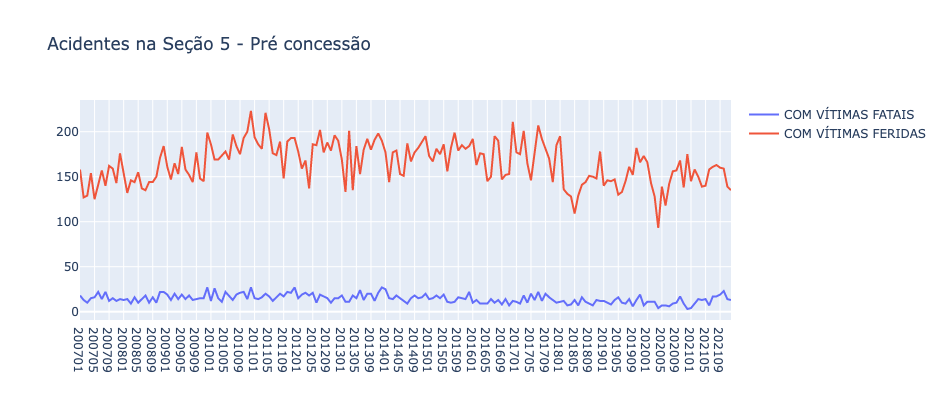

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                           180.000000           180.000000
mean                             14.472222           164.994444
std                               4.896049            22.976670
min                               3.000000            93.000000
25%                              11.000000           146.000000
50%                              14.000000           166.000000
75%                              18.000000           182.250000
max                              27.000000           223.000000

In [22]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 5 TODA A SÉRIE HISTÓRICA
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 5
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()


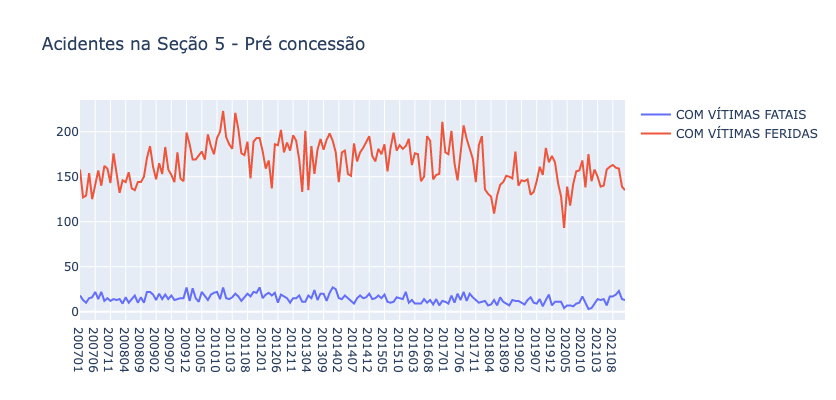

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                           180.000000           180.000000
mean                             14.472222           164.994444
std                               4.896049            22.976670
min                               3.000000            93.000000
25%                              11.000000           146.000000
50%                              14.000000           166.000000
75%                              18.000000           182.250000
max                              27.000000           223.000000

In [23]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora) | 5 TODA A SÉRIE HISTÓRICA
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 5
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()


# ACHADO

Como houve uma grande redução da quantidade dos registros de acidentes classificados como "Sem Vítimas" a partir de 2014, este estudo vai desconsiderar os registros. Portanto, o estudo vai considerar somente os registros de acidentes classificados como "Com Vítimas Feridas" e "Com Vítimas Fatais".



##### 3.2.1.1. Acidentes na Seção 1 - Antes da Concessão


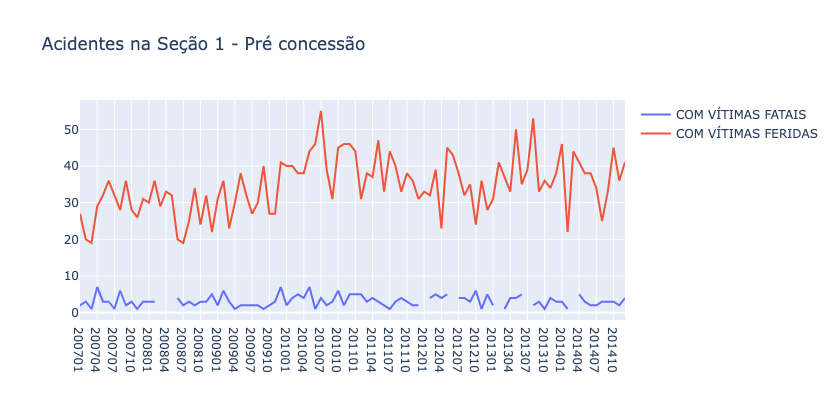

classificacao_acidente anomes_nr  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
0                         200701                 2.0                 27.0
1                         200702                 3.0                 20.0
2                         200703                 1.0                 19.0
3                         200704                 7.0                 29.0
4                         200705                 3.0                 32.0
..                           ...                 ...                  ...
91                        201408                 3.0                 25.0
92                        201409                 3.0                 33.0
93                        201410                 3.0                 45.0
94                        201411                 2.0                 36.0
95                        201412                 4.0                 41.0

[96 rows x 3 columns]

In [24]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 1
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa


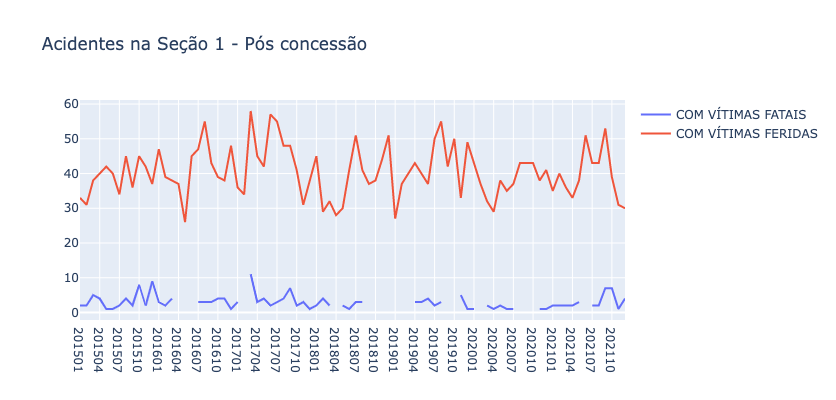

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            70.000000            84.000000
mean                              2.900000            40.464286
std                               2.001087             7.233534
min                               1.000000            26.000000
25%                               2.000000            36.000000
50%                               2.000000            40.000000
75%                               4.000000            45.000000
max                              11.000000            58.000000

In [25]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 1
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

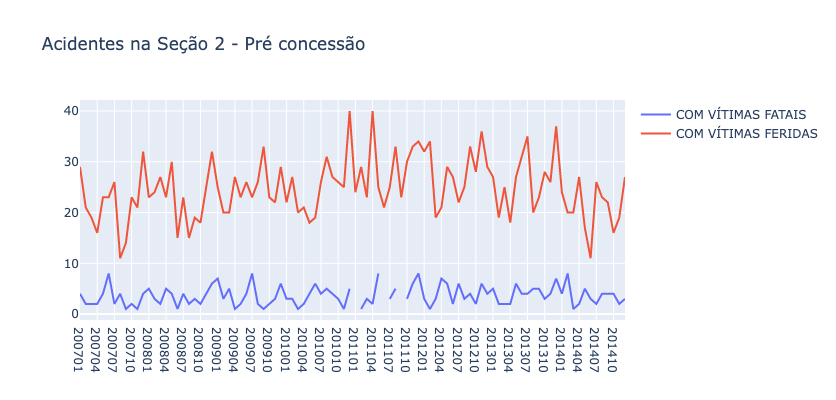

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            93.000000            96.000000
mean                              3.645161            24.729167
std                               1.886135             5.857032
min                               1.000000            11.000000
25%                               2.000000            21.000000
50%                               3.000000            24.500000
75%                               5.000000            28.000000
max                               8.000000            40.000000

In [26]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 2
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

##### 3.2.1.2. Acidentes na Seção 1 - Pós da Concessão

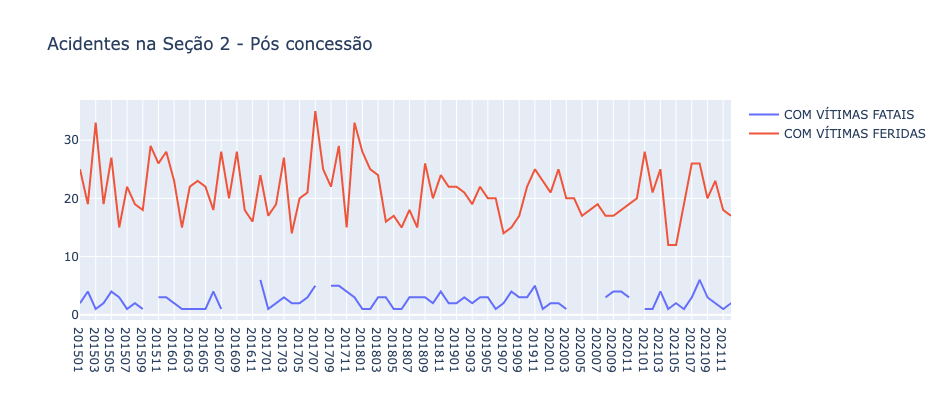

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            75.000000            84.000000
mean                              2.480000            21.214286
std                               1.318886             4.802287
min                               1.000000            12.000000
25%                               1.000000            18.000000
50%                               2.000000            20.000000
75%                               3.000000            25.000000
max                               6.000000            35.000000

In [27]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 2
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

In [28]:
dfa

classificacao_acidente anomes_nr  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
0                         201501                 2.0                 25.0
1                         201502                 4.0                 19.0
2                         201503                 1.0                 33.0
3                         201504                 2.0                 19.0
4                         201505                 4.0                 27.0
..                           ...                 ...                  ...
79                        202108                 6.0                 26.0
80                        202109                 3.0                 20.0
81                        202110                 2.0                 23.0
82                        202111                 1.0                 18.0
83                        202112                 2.0                 17.0

[84 rows x 3 columns]

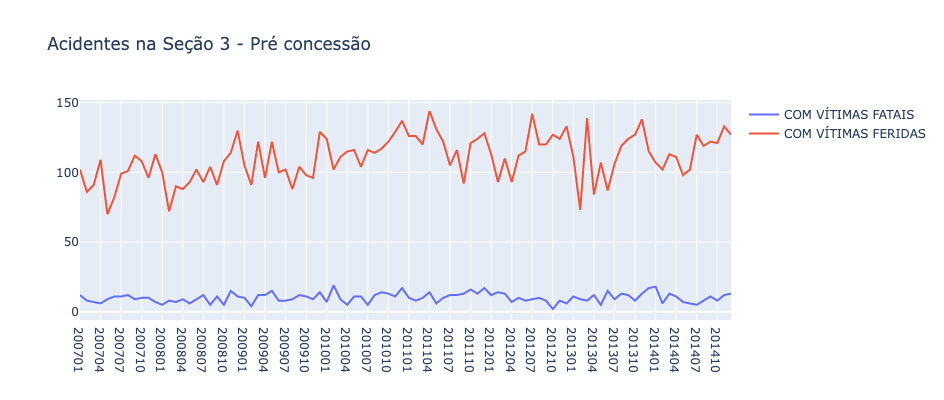

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            96.000000            96.000000
mean                             10.114583           110.239583
std                               3.377541            16.034006
min                               2.000000            70.000000
25%                               8.000000            99.750000
50%                              10.000000           111.500000
75%                              12.000000           122.000000
max                              19.000000           144.000000

In [29]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 3
pos_concessao = 0
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

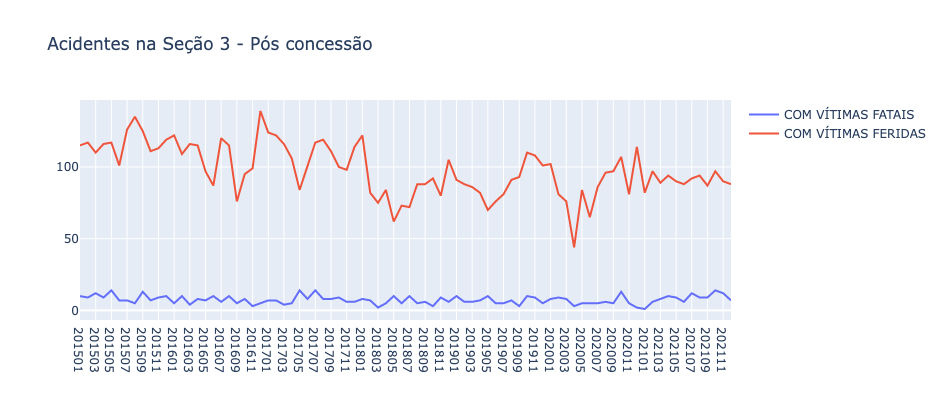

classificacao_acidente  COM VÍTIMAS FATAIS  COM VÍTIMAS FERIDAS
count                            84.000000            84.000000
mean                              7.440476            97.952381
std                               2.938532            17.860844
min                               1.000000            44.000000
25%                               5.000000            86.000000
50%                               7.000000            97.000000
75%                               9.000000           114.000000
max                              14.000000           139.000000

In [30]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)

secao = 3
pos_concessao = 1
dfa = _plot_line_graf(_get_acidentes(dftc,secao,pos_concessao), secao,pos_concessao)
dfa.describe()

In [31]:
dftc.isna().sum()

id                           0
data_inversa                 0
dia_semana                   0
uf                           0
br                           0
km                           0
municipio                    0
causa_acidente               0
tipo_acidente                1
classificacao_acidente       0
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
uso_solo                     0
latitude                  4295
longitude                 4295
kmint                        0
ano                          0
mes                          0
ano_mes                      0
anomes_nr                    0
hora                         0
minuto                       0
secao                        0
pos_concessao                0
target                       0
ilesos                       0
feridos_leves                0
feridos_graves               0
mortos                       0
automove

# ACIDENTES - SHAP - Scikit-Learn

a partir do exemplo 
https://www.rasgoml.com/feature-engineering-tutorials/scikit-learn-gradient-boosted-tree-feature-selection-with-shapley-importance

In [32]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
import shap
import category_encoders as ce

import xgboost as xgb

from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier

%matplotlib inline

# load JS visualization code to notebook
shap.initjs()


In [33]:
def _prepare_data(dfacid, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Prepara o DataFrame 
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    # Filtro no DataFrame para seção e concessão
    df = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    
    # target para acidentes com Vítimas graves e fatais = 1, e Vítimas leves = 0
    df.dropna(inplace=True)

    # map para a classificação de assidentes - nosso target
    df['classificacao_acidente'] = df['classificacao_acidente'].map({'COM VÍTIMAS FERIDAS':0,'COM VÍTIMAS FATAIS':1,'IGNORADO':2, 'SEM VÍTIMAS':3})

    # Drop nas colunas que não serão usadas na análise
    df = df.drop(columns=[ 'id',
                           'data_inversa',
                           'br',
                           'latitude',                
                           'longitude',
                           'kmint',
                           'ano',
                           'ano_mes', 
                           'minuto'])
    
     
    # Definição do X e y para o ML
    X = df.drop(['classificacao_acidente'], axis=1)
    y = df['classificacao_acidente']
    
    # Split para o modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X, y


def _exec_shap(X, y, tipo):
    shap.initjs()
    
    # Separa o campo target - objetivo a ser predito
    target = 'target'
    # Separa o Target

    # Split para o modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    
    # Encoder para colunas categóricas
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    
    if tipo == 'GBR':
        # Cria o modelo com GradientBoostingRegressorf 
        model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
        model.fit(X_train_loo, y_train)
    
        # Resultados do modelo
        rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
        explainer = shap.Explainer(model)
        shap_values = explainer(X_test_loo)
        shap_importance = shap_values.abs.mean(0).values
        importance_df = pd.DataFrame({'features': X_train_loo.columns,
                                      'importance': shap_importance})
        importance_df.sort_values(by='importance', ascending=False, inplace=True)


        shap_values = shap.TreeExplainer(model).shap_values(X_test_loo)
        
        #shap.plots.waterfall(shap_values[0])

        shap.summary_plot(shap_values, X_test_loo, plot_type="dot")
    elif tipo == 'RFR':    
        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
        model.fit(X_train_loo, y_train)
                
        # Classification report
        p = model.predict(X_test_loo)
        print(classification_report(y_test, p))
        
        # para imprimir Shapley
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_loo)
       # shap_importance = shap_values.abs.mean(0).values
       # importance_df = pd.DataFrame({'features': X_train_loo.columns,
       #                               'importance': shap_importance})
       # importance_df.sort_values(by='importance', ascending=False, inplace=True)

        #shap.summary_plot(shap_values[0], X_test_loo, plot_type='dots') 
        
        shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_loo.iloc[0,:])
        #shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_loo.iloc[0,:])
        shap.dependence_plot(8, shap_values[0], X_test_loo)
        shap.plots.waterfall(shap_values[0], y_test, X_test_loo[0])
        rmse = 0
        importance_df = 0

    elif tipo == 'RFC':    
        model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
        model.fit(X_train_loo, y_train)
                
        # Classification report
        p = model.predict(X_test_loo)
        print(classification_report(y_test, p))
        
        # para imprimir Shapley
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_loo)
       # shap_importance = shap_values.abs.mean(0).values
       # importance_df = pd.DataFrame({'features': X_train_loo.columns,
       #                               'importance': shap_importance})
       # importance_df.sort_values(by='importance', ascending=False, inplace=True)

        #shap.summary_plot(shap_values[0], X_test_loo, plot_type='dots') 
        
        shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test_loo.iloc[0,:])
        #shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_loo.iloc[0,:])
        shap.dependence_plot(8, shap_values[0], X_test_loo)
        shap.plots.waterfall(shap_values[0], y_test, X_test_loo[0])
        rmse = 0
        importance_df = 0
   
    elif tipo == 'XGB':
        
        
        # train XGBoost model
        model = xgboost.XGBClassifier().fit(X_train_loo, y_train)

        #print('Best Error: {.2f} with {} rounds'.format(model.best_score, model.best_interaction+1))
        
        
        # compute SHAP values
        explainer = shap.Explainer(model, X_train_loo)
        shap_values = explainer(X_train_loo)
        
        shap_importance = shap_values.abs.mean(0).values
        importance_df = pd.DataFrame({'features': X_train_loo.columns,
                                      'importance': shap_importance})
        importance_df.sort_values(by='importance', ascending=False, inplace=True)
      
        shap.plots.waterfall(shap_values[0])
        rmse = 0
        importance_df = 0
        
        #print(importance_df)
        
        shap.dependence_plot("tracado_via", shap_values, y_train, interaction_index="tracado_via")
    
        
    #model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
    #model.fit(X_train_loo, y_train)
    
    #p = model.predict(X_test_loo)
    #print(classification_report(y_test, model.predict(X_test_loo)))
    #print(p)

    return rmse, importance_df


In [34]:
pare aqui
dftc

SyntaxError: invalid syntax (1233262522.py, line 1)

In [35]:
# importe do cross_val_score
from sklearn.model_selection import cross_val_score

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Prepara o DataFrame 
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Filtro no DataFrame para seção e concessão
df = dftc[(dftc['secao']==1)&(dftc['pos_concessao']==1)&(dftc['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
# total
#df = dftc[(dftc['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

# Target - Acidentes Graves (mortos ou feridos graves)
#df['acidente_grave'] = df['acidente_grave'].map({'COM VÍTIMAS FERIDAS':0,'COM VÍTIMAS FATAIS':1,'IGNORADO':2, 'SEM VÍTIMAS':3})
df['acidente_grave'] = 0
df.loc[df['mortos'] > 0, 'acidente_grave'] = 1
df.loc[df['feridos_graves'] > 0, 'acidente_grave'] = 1

# target para acidentes com Vítimas graves e fatais = 1, e Vítimas leves = 0
df.dropna(inplace=True)

# map para o tipo de pista - nosso target
#df['tipo_pista'] = df['tipo_pista'].map({'DUPLA':1,'MÚLTIPLA':1,'SIMPLES':0, '(NULL)':0})

# Drop nas colunas que não serão usadas na análise
df = df.drop(columns=[ 'id',
                       'data_inversa',
                       'br',
                       'latitude',                
                       'longitude',
                       'kmint',
                       'ano',
                       'ano_mes', 
                       'anomes_nr',
                       'km',
                       'hora',
                       'mes',
                       'municipio',
                       'uso_solo',
                       'target',
                       'secao',
                       'pos_concessao',
                       'minuto',
                       'ilesos',
                       'feridos_leves',
                       'feridos_graves',
                       'classificacao_acidente',
                       'mortos'])
             
#df['anomes_nr'] = df['anomes_nr'].astype('int')


df = pd.get_dummies(df)

# Filtro para pegar por tipo de acidente
#df = df[(df['acidente_grave']==1)&(df['tipo_acidente_ATROPELAMENTO DE PESSOA']>=1)] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

# Definição do X e y para o ML
X = df.drop(['acidente_grave'], axis=1)
y = df['acidente_grave']
print(df['acidente_grave'].unique())
#df.info()


# Split para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

[0 1]
(2471, 130) (1060, 130) (2471,) (1060,)


In [36]:
df

automovel  bicicleta  caminhao  utilitario  tracao_animal  onibus  \
1              1          1         0           0              0       0   
2              0          0         0           0              0       0   
3              1          0         0           0              0       0   
18             0          0         0           1              0       0   
27             0          0         0           0              0       0   
...          ...        ...       ...         ...            ...     ...   
32249          1          0         0           0              0       0   
32270          1          0         0           0              0       0   
32278          1          1         0           0              0       0   
32280          0          0         0           0              0       0   
32281          1          0         0           0              0       0   

       moto  sem_informacao  outros  reboque  ...  tracado_via_CURVA  \
1         0               0       0        0  ...                  0   
2         1               0       0        0  ...                  0   
3         1               0       0        0  ...                  0   
18        1               0       0        0  ...                  0   
27        1               0       0        0  ...                  0   
...     ...             ...     ...      ...  ...                ...   
32249     1               0       0        0  ...                  0   
32270     1               0       0        0  ...                  0   
32278     0               0       0        0  ...                  0   
32280     1               0       0        0  ...                  0   
32281     1               0       0        0  ...                  0   

       tracado_via_DESVIO TEMPORÁRIO  tracado_via_INTERSEÇÃO DE VIAS  \
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
18                                 0                               0   
27                                 0                               0   
...                              ...                             ...   
32249                              0                               0   
32270                              0                               0   
32278                              0                               0   
32280                              0                               0   
32281                              0                               0   

       tracado_via_NÃO INFORMADO  tracado_via_PONTE  tracado_via_RETA  \
1                              0                  0                 1   
2                              0                  0                 1   
3                              0                  0                 1   
18                             0                  0                 1   
27                             0                  0                 1   
...                          ...                ...               ...   
32249                          0                  0                 1   
32270                          0                  0                 1   
32278                          0                  0                 1   
32280                          0                  0                 1   
32281                          0                  0                 1   

       tracado_via_RETORNO REGULAMENTADO  tracado_via_ROTATÓRIA  \
1                                      0                      0   
2                                      0                      0   
3                                      0                      0   
18                                     0                      0   
27                                     0                      0   
...                                  ...                    ...   
32249             

In [37]:
X_train

automovel  bicicleta  caminhao  utilitario  tracao_animal  onibus  \
16886          1          0         0           0              0       0   
9905           0          0         0           0              0       0   
8104           1          0         0           0              0       0   
5245           1          0         0           0              0       0   
8551           1          0         0           0              0       0   
...          ...        ...       ...         ...            ...     ...   
8040           2          0         0           0              0       0   
24762          1          0         0           0              0       0   
284            0          0         0           1              0       0   
18975          0          0         0           0              0       0   
3659           1          0         0           0              0       0   

       moto  sem_informacao  outros  reboque  ...  tracado_via_CURVA  \
16886     1               0       0        0  ...                  0   
9905      1               0       0        0  ...                  0   
8104      0               0       0        0  ...                  0   
5245      1               0       0        0  ...                  0   
8551      0               0       0        0  ...                  1   
...     ...             ...     ...      ...  ...                ...   
8040      0               0       0        0  ...                  0   
24762     0               0       0        0  ...                  0   
284       1               0       0        0  ...                  0   
18975     1               0       0        0  ...                  0   
3659      1               0       0        0  ...                  0   

       tracado_via_DESVIO TEMPORÁRIO  tracado_via_INTERSEÇÃO DE VIAS  \
16886                              0                               0   
9905                               0                               0   
8104                               0                               0   
5245                               0                               0   
8551                               0                               0   
...                              ...                             ...   
8040                               0                               0   
24762                              0                               0   
284                                0                               0   
18975                              0                               0   
3659                               0                               0   

       tracado_via_NÃO INFORMADO  tracado_via_PONTE  tracado_via_RETA  \
16886                          0                  0                 1   
9905                           0                  0                 1   
8104                           0                  0                 1   
5245                           0                  0                 1   
8551                           0                  0                 0   
...                          ...                ...               ...   
8040                           0                  0                 1   
24762                          0                  0                 1   
284                            0                  0                 1   
18975                          0                  0                 1   
3659                           0                  0                 1   

       tracado_via_RETORNO REGULAMENTADO  tracado_via_ROTATÓRIA  \
16886                                  0                      0   
9905                                   0                      0   
8104                                   0                      0   
5245                                   0                      0   
8551                                   0                      0   
...                                  ...                    ...   
8040              

In [38]:
# train XGBoost model
classificador_xgb = xgb.XGBClassifier()
resultado_cv = cross_val_score(classificador_xgb, X_train, y_train)

resultado_cv

array([0.71717172, 0.69838057, 0.68218623, 0.72064777, 0.69838057])

In [39]:
100 * cross_val_score(classificador_xgb, X_train, y_train).mean()

70.33533717744243

In [40]:
#classificador_campeao.fit(X_train, y_train)

In [41]:
classificador_xgb_tunado = xgb.XGBClassifier(max_depth=2)
100 * cross_val_score(classificador_xgb_tunado, X_train, y_train).mean()

71.79315421420685

In [42]:
classificador_xgb_dart = xgb.XGBClassifier(booster='dart')
100 * cross_val_score(classificador_xgb_dart, X_train, y_train).mean()

70.33533717744243

In [43]:
classificador_xgb_linear = xgb.XGBClassifier(booster='gblinear')
100 * cross_val_score(classificador_xgb_linear, X_train, y_train).mean()

71.50934445671287

In [45]:
classificador_campeao = classificador_xgb_tunado

In [47]:
classificador_campeao.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
#print(classificador_campeao)

In [52]:
y_pred_train_proba = classificador_campeao.predict_proba(X_train)
print('Probabilidade do modelo prever como acidente não grave = ',(100*y_pred_train_proba[3][0]).round(2),'%.')
print('Probabilidade do modelo prever como acidente grave = ',(100*y_pred_train_proba[3][1]).round(2),'%.')



Probabilidade do modelo prever como acidente não grave =  72.86 %.
Probabilidade do modelo prever como acidente grave =  27.14 %.


In [53]:
predict = classificador_campeao.predict(X_test)

In [55]:
predict[:44]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [56]:
len(predict) , len(y_test)

(1060, 1060)

In [57]:
(predict == y_test).sum()

780

In [58]:
acuracia_teste = 100* (predict == y_test).sum() / len(y_test)
print('No teste, o modelo acertou {:.2f}% das previsões na base de teste.'.format(acuracia_teste))

No teste, o modelo acertou 73.58% das previsões na base de teste.


In [59]:
model = xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
'''
    * "weight" is the number of times a feature appears in a tree
    * "gain" is the average gain of splits which use the feature
    * "cover" is the average coverage of splits which use the feature
      where coverage is defined as the number of samples affected by the split
'''

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

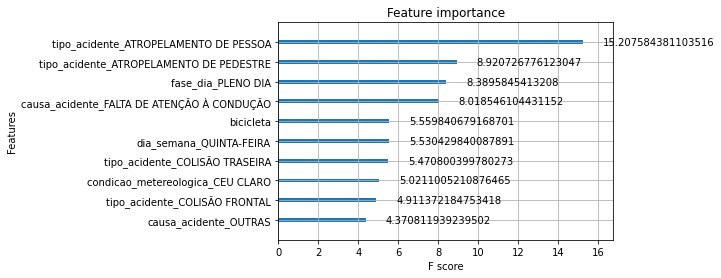

In [60]:
xgb.plot_importance(classificador_campeao, max_num_features=10, importance_type="gain")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

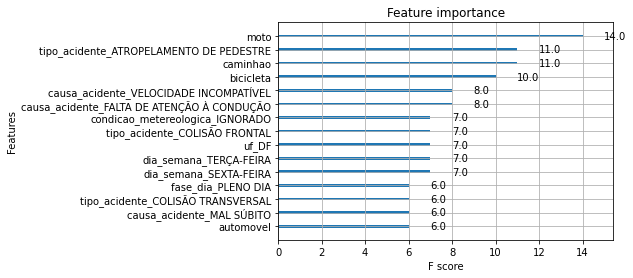

In [61]:
xgb.plot_importance(classificador_campeao, max_num_features=15)

In [63]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model=classificador_campeao)
shap_values = explainer.shap_values(X_train, y_train)

In [64]:
expected_value = explainer.expected_value
print(expected_value)

# Apresentar em tela
#print('Valor de base para classe negativa -',100*expected_value[0].round(2))
#print('Valor de base para classe positiva -',100*expected_value[1].round(2))

# Somatório dos valores SHAP para classe positiva
#print('Somatório SHAP para classe negativa nesta amostra:',100*y_pred_train_proba[3][0].round(2)-100*expected_value[0].round(2))
#print('Somatório SHAP para classe positiva nesta amostra:',100*y_pred_train_proba[3][1].round(2)-100*expected_value[1].round(2)) 


-0.9349122


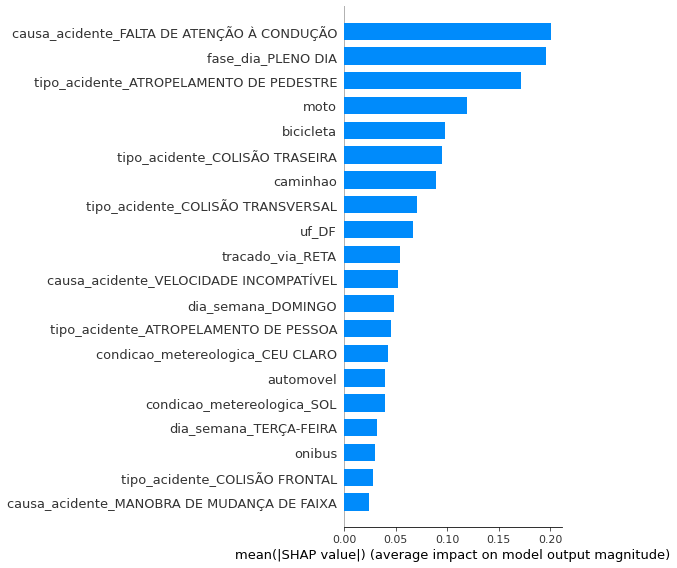

In [65]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(8,8));

In [73]:
# force plot para previsão de negativo - Sem gravidade - pegou-se o primeiro caso
shap.force_plot(explainer.expected_value, shap_values[43,:], X.iloc[43,:])

In [ ]:
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [70]:
# force plot para previsão de negativo - Acidente Grave
shap.force_plot(explainer.expected_value, shap_values[2,:], X.iloc[2,:])

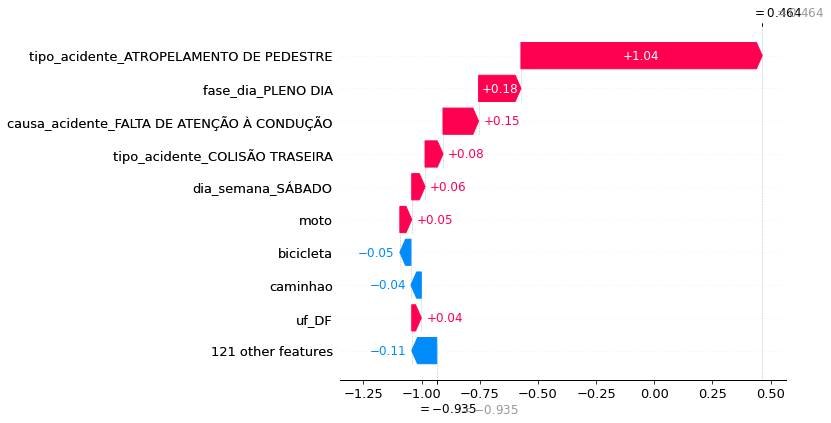

In [72]:
shap.plots._waterfall.waterfall_legacy(expected_value=explainer.expected_value, shap_values=shap_values[43,:], feature_names=X_train.columns, show=True)


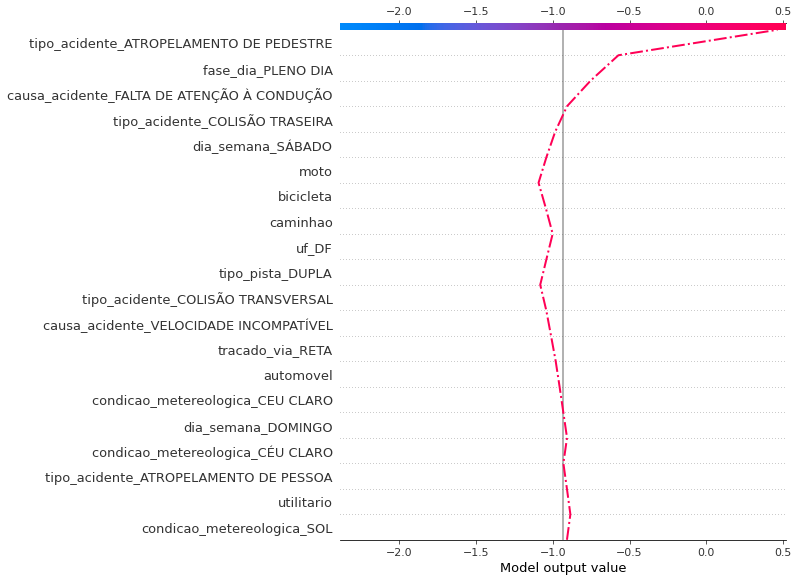

In [75]:
shap.decision_plot(base_value=expected_value, shap_values=shap_values[43,:], features=X_train.columns,highlight=0)

In [76]:
#shap.summary_plot(shap_values[1][3], X)

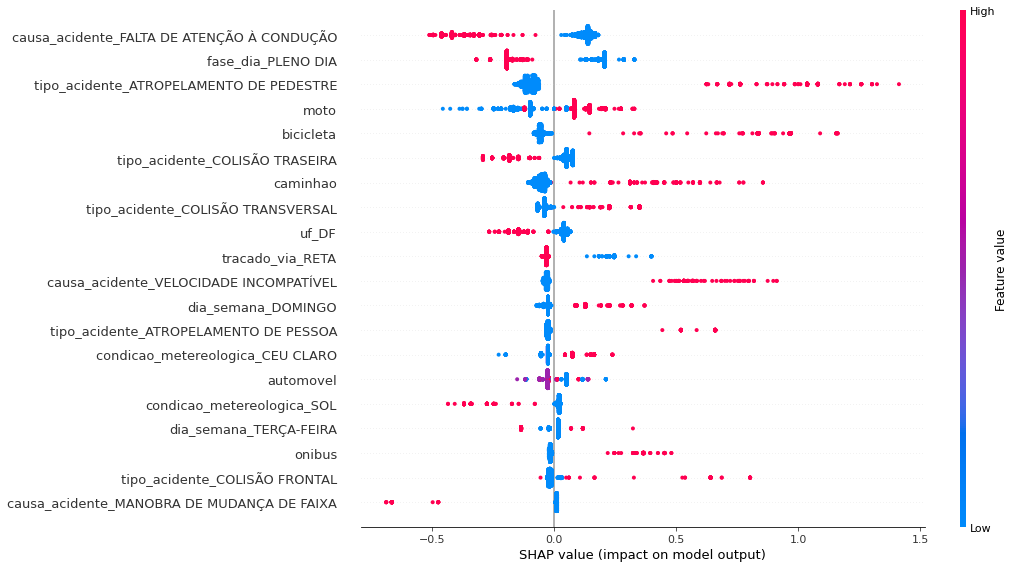

In [82]:

shap.summary_plot(shap_values, X_train, plot_type="dot", plot_size=(15,8))


In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)

In [ ]:
# compute SHAP values
background_adult = shap.maskers.Independent(X_train, max_samples=100)
#explainer = shap.Explainer(classificador_campeao, background_adult)
explainer = shap.Explainer(classificador_campeao, background_adult)

shap_values = explainer(X_train)
#shap.plots.bar(shap_values)
#shap.plots.bar(shap_values.abs.max(0))

In [ ]:

shap_importance = shap_values.abs.mean(0).values
#importance_df = pd.DataFrame({'features': X_train.columns,
#                              'importance': shap_importance})
#importance_df.sort_values(by='importance', ascending=False, inplace=True)
shap_importance

In [ ]:
#shap.plots.waterfall(shap_values[0])
#shap.waterfall_plot(explainer.base_values[0], values[0], X[0])
#shap.waterfall_plot(explainer.base_values[0], values[0][0][0], X[0])

In [ ]:
explainer.bas_values[0]

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 0
X, y = _prepare_data(dftc, secao, pos_concessao)

ff





In [ ]:
y.shape

In [ ]:

#rmse, importance_df = _exec_shap(X, y, 'RFC')
rmse, importance_df = _exec_shap(X, y,'XGB')

print('Shap dos Acidentes da Seção 1 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
#rmse, importance_df = _exec_shap(xx, 'XGB')

print('Shap dos Acidentes da Seção 1 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 1
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 1 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2


In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 2
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 2 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 2
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 2 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 3
pos_concessao = 0
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 3 do trecho, do período pré concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

In [ ]:
# Seções - 1 (DF até Cristalina) | 2 (Cristalina até Curvelo) | 3 (Curvelo até Juiz de Fora)
# Pos Concessão - 0 (antes da concessão -> até junho de 2014) | 1 (a partir de julho de 2014)
secao = 3
pos_concessao = 1
rmse, importance_df = _exec_shap(_prepare_data(dftc, secao, pos_concessao), 'XGB')
print('Shap dos Acidentes da Seção 3 do trecho, do período pós concessão!!!')
print('RMSE = ', rmse)
importance_df

In [ ]:
# plotar mapa de calor
m = _plot_heatmap(dftc, secao, pos_concessao, 0)
m

In [ ]:
m2 = _plot_cluster_map(dftc, secao, pos_concessao, 0)
m2

# 4. ESTATÍSTICA DESCRITIVA - Veículos

In [ ]:
# montagem do Dataframe
dfvei = dftc[col_veiculos]
print('Tamanho do Datafrema original ', len(dfvei))


In [ ]:
# sobre os campos AN0
dfvei.loc[dfvei['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = -1
dfvei.ano.fillna(-1) #[dfvei['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = -1
dfvei["ano_fabricacao_veiculo"] = dfvei["ano_fabricacao_veiculo"].str.strip()
dfvei["ano_fabricacao_veiculo"] = pd.to_numeric(dfvei["ano_fabricacao_veiculo"])
dfvei["idade_veiculo"] = dfvei["ano"] - dfvei["ano_fabricacao_veiculo"]
# Campo id_veiculo
dfvei['id_veiculo'].fillna('-1', inplace = True)
# Campo tipo_veiculo
dfvei['tipo_veiculo'].fillna('Não Discriminado', inplace = True)
dfvei['tipo_veiculo'] = dfvei['tipo_veiculo'].str.upper()
dfvei.loc[dfvei['tipo_veiculo'] == '(NULL)', 'tipo_veiculo'] = 'NÃO DISCRIMINADO'
dfvei.loc[dfvei['tipo_veiculo'] == 'SEXTA', 'dia_semana'] = 'SEXTA-FEIRA'
dfvei.loc[dfvei['tipo_veiculo'] == 'MICROÔNIBUS', 'tipo_veiculo'] = 'MICRO-ÔNIBUS'
dfvei.loc[dfvei['tipo_veiculo'] == 'SEMIREBOQUE', 'tipo_veiculo'] = 'SEMI-REBOQUE'


dfvei

In [ ]:
# agregação dos quantitativos de vítimas 
dictio = {'id_veiculo':'count', 'ilesos':'sum','feridos_leves':'sum','feridos_graves':'sum', 'mortos':'sum'}

dfagg = dfvei.groupby(['id_veiculo', 'tipo_veiculo', 'ano', 'mes', 'hora', 'minuto']).agg(dictio)
dfagg.rename(columns={'id_veiculo':'qtd'}, inplace=True)
dfagg.reset_index(inplace=True)
dfagg

In [ ]:

# retirar as duplicações do acidentes
dfvei = dfvei.drop_duplicates(subset=['id_veiculo', 'tipo_veiculo', 'ano', 'mes', 'hora', 'minuto'], keep='last')
# Total de registros únicos
print('Tamanho do Datafrema sem duplicações ', len(dfvei))

In [ ]:
#dfvei.loc[dfvei['id_veiculo'] == 175013]
dfvei.loc[dfvei['id'] == 175013]

In [ ]:
##
dfvei = pd.merge(dfvei, dfagg, how = 'inner', on = ['id_veiculo', 'tipo_veiculo', 'ano', 'mes', 'hora', 'minuto'])
#dfacid = pd.concat([dfacid, dfagg], axis=1)
dfvei = dfvei.drop(['ilesos_x', 'feridos_leves_x', 'feridos_graves_x', 'mortos_x'], axis=1)
dfvei.rename(columns={'ilesos_y':'ilesos', 'feridos_leves_y':'feridos_leves', 'feridos_graves_y':'feridos_graves', 'mortos_y':'mortos'}, inplace=True)
#dfacid.loc[:, ['ilesos_x', 'feridos_leves_x', 'feridos_graves_x', 'mortos_x', 'ilesos_y', 'feridos_leves_y', 'feridos_graves_y', 'mortos_y']]


In [ ]:
dfvei.loc[(dfvei['classificacao_acidente'] != 'SEM VÍTIMAS') & (dfvei['classificacao_acidente'] != 'IGNORADOS')].groupby(['anomes_nr', 'tipo_veiculo', 'classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

In [ ]:
dfvei.loc[(dfvei['anomes_nr'] == '200701')&(dfvei['tipo_veiculo'] == 'BICICLETA')]

In [ ]:
dfv = dfvei[(dfvei['secao']==1)&(dfvei['pos_concessao']==0)&((dfvei['classificacao_acidente']!='SEM VÍTIMAS') & (dfvei['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','tipo_veiculo']).agg({'id_veiculo':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

#dfv = dfvei[(dfvei['secao']==secao)&(dfvei['pos_concessao']==pos_concessao)].groupby(['ano','tipo_veiculo']).agg({'id_veiculo':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
dfv = pd.pivot_table(dfv, values='id_veiculo', index=['anomes_nr'],
                         columns=['tipo_veiculo'], aggfunc=np.sum)
dfv.reset_index(inplace=True)
dfv.fillna(0)


In [ ]:
dfv
#dfv.reset_index(inplace=True)

## 4.1 - Estatísticas

### 4.1.1. 

In [ ]:
def _get_veiculos_acid(dfvei, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

    dfv = dfvei[(dfvei['secao']==secao)&(dfvei['pos_concessao']==pos_concessao)&((dfvei['classificacao_acidente']!='SEM VÍTIMAS') & (dfvei['classificacao_acidente']!='IGNORADO'))].groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

    #dfv = dfvei[(dfvei['secao']==secao)&(dfvei['pos_concessao']==pos_concessao)].groupby(['ano','tipo_veiculo']).agg({'id_veiculo':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    #dfa = dfacid.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    dfv = pd.pivot_table(dfv, values='id_veiculo', index=['anomes_nr'],
                         columns=['tipo_veiculo'], aggfunc=np.sum)
    #dfa.reset_index(inplace=True)
    dfv.reset_index(inplace=True)
    dfv.fillna(0)
    return dfv


def _plot_line_graf(dfa, secao, pos_concessao):
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # Quantitativo de acidentes por classificação de acidente
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    if pos_concessao == 0:
        tit = 'Pré concessão'
    else:
        tit = 'Pós concessão'
    
    titulo = f'Acidentes na Seção {secao} - {tit}'
    
    figura = px.line(title = titulo, width=1100, height=400)
    for i in dfa.columns[1:]:
        figura.add_scatter(x = dfa["anomes_nr"] ,y = dfa[i], name = i)
        #figura.add_scatter(x = table["anomes_nr"] ,y = table[i], name = i)
    figura.show()
    return dfa

In [ ]:
xx = _get_veiculos_acid(dfvei,1,0)

In [ ]:
xx

In [ ]:
x1 = _get_veiculos_acid(dfvei,1,1)

In [ ]:
x1

# VEICULOS - SHAP - Scikit-Learn


In [ ]:
def _executa_shap_veiculos(dfacid, secao, pos_concessao):
    df = dfacid[(dfacid['secao']==secao)&(dfacid['pos_concessao']==pos_concessao)&(dfacid['classificacao_acidente']!='SEM VÍTIMAS')] #.groupby(['anomes_nr','classificacao_acidente']).agg({'id':'count', 'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
    df['target'] = False
    df.loc[df['mortos'] > 0, 'target'] = True
    df.loc[df['feridos_graves'] > 0, 'target'] = True
    df.dropna(inplace=True)
    target = 'target'
    y = df[target]
    X = df.drop(columns=[target, 
                         'id', 
                         'data_inversa', 
                         'br', 
                         'kmint', 
                         'classificacao_acidente', 
                         'sentido_via', 
                         'uso_solo', 
                         'ano_mes', 
                         'anomes_nr', 
                         'mortos',
                         'feridos_leves',
                         'feridos_graves', 
                         'ilesos', 
                         'secao', 
                         'pos_concessao', 
                         'uf', 
                         'minuto',
                         'ano'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1066)
    encoder = ce.LeaveOneOutEncoder(return_df=True)
    X_train_loo = encoder.fit_transform(X_train, y_train)
    X_test_loo = encoder.transform(X_test)
    model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
    model.fit(X_train_loo, y_train)
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
    explainer = shap.Explainer(model)
    shap_values = explainer(X_test_loo)
    shap_importance = shap_values.abs.mean(0).values
    importance_df = pd.DataFrame({'features': X_train_loo.columns,
                                  'importance': shap_importance})
    importance_df.sort_values(by='importance', ascending=False, inplace=True)

    return rmse, importance_df


In [ ]:
# Deletar nulos
df.dropna(inplace=True)

In [ ]:
df

In [ ]:
target = 'target'
y = df[target]
X = df.drop(columns=[target, 'id', 'data_inversa', 'br', 'kmint', 'classificacao_acidente', 
                     'sentido_via', 'uso_solo', 'ano_mes', 'anomes_nr', 'mortos',
                    'feridos_leves','feridos_graves', 'ilesos', 'secao', 'pos_concessao', 'uf', 'minuto','ano'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1066)


In [ ]:
X

In [ ]:

encoder = ce.LeaveOneOutEncoder(return_df=True)
X_train_loo = encoder.fit_transform(X_train, y_train)
X_test_loo = encoder.transform(X_test)


In [ ]:

model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
model.fit(X_train_loo, y_train)

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test_loo)))
rmse


In [ ]:

explainer = shap.Explainer(model)
shap_values = explainer(X_test_loo)
shap_importance = shap_values.abs.mean(0).values
importance_df = pd.DataFrame({'features': X_train_loo.columns,
                              'importance': shap_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df


In [ ]:

feature_list = importance_df[importance_df.importance > 0.15]['features'].tolist()
feature_list


In [ ]:
feature_list = importance_df['features'].head(5).tolist()
feature_list

In [ ]:

X_train_loo_new = X_train_loo[feature_list]
X_test_loo_new = X_test_loo[feature_list]


In [ ]:

reduced_model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, min_samples_split=5, n_iter_no_change=10)
reduced_model.fit(X_train_loo_new, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reduced_model.predict(X_test_loo_new)))
rmse


## SHapley

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html

In [ ]:
def _sep_dataset(df, target):
    target=df.loc[:,[target]]
    #target.to_numpy()
    dfsource = df.drop(columns=target)
    return dfsource, target
    
#X.dropna(subset=['latitude', 'longitude'], inplace=True)

#del df2shap

In [ ]:
aggr_fld = ['tracado_via']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['uso_solo']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['classificacao_acidente']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['fase_dia']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['tipo_pista']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

SUGESTÕES DE PERGUNTAS:
- Relação de causa do acidente x tipo do acidente x horario do acidente x condição meteorologica x tipo de pista x traçado da via x uso do solo x dia da semana com a mortalidade dos acidentes?
- Relação de tipos de veículos x mortalidade dos acidentes?
- Escolher um trecho de rodovia concedida para analisar. Exemplo: BR-040 DF até Juiz de Fora; 

#### Domínios do acidente

Exemplo   | Valor do exemplo
--------- | ------
causa_acidente | Reação tardia ou ineficiente do condutor ,Velocidade Incompatível ,Demais falhas mecânicas ou elétricas ,Entrada inopinada do pedestre ,Condutor Dormindo ,Frear bruscamente ,Acessar a via sem observar a presença dos outros veículos ,Chuva ,Ausência de reação do condutor ,Pedestre andava na pista ,Problema com o freio ,Carga excessiva e/ou mal acondicionada ,Ingestão de álcool pelo condutor ,Acostamento em desnível ,Ultrapassagem Indevida ,Mal súbito do condutor ,Curva acentuada ,Avarias e/ou desgaste excessivo no pneu ,Acumulo de água sobre o pavimento ,Condutor deixou de manter distância do veículo da frente ,Pedestre cruzava a pista fora da faixa ,Falta de elemento de contenção que evite a saída do leito carroçável ,Manobra de mudança de faixa ,Demais falhas na via ,Condutor usando celular ,Pista Escorregadia ,Ingestão de álcool ou de substâncias psicoativas pelo pedestre ,Obstrução na via ,Ingestão de álcool e/ou substâncias psicoativas pelo pedestre ,Acumulo de óleo sobre o pavimento ,Ingestão de substâncias psicoativas pelo condutor ,Transitar na contramão ,Iluminação deficiente ,Pista esburacada ,Conversão proibida ,Afundamento ou ondulação no pavimento ,Animais na Pista ,Demais Fenômenos da natureza ,Transitar no acostamento ,Desrespeitar a preferência no cruzamento ,Falta de acostamento ,Objeto estático sobre o leito carroçável ,Pista em desnível ,Estacionar ou parar em local proibido ,Área urbana sem a presença de local apropriado para a travessia de pedestres ,Desvio temporário ,Declive acentuado ,Obras na pista ,Ausência de sinalização ,Acumulo de areia ou detritos sobre o pavimento ,Problema na suspensão ,Acesso irregular ,Retorno proibido ,Sinalização mal posicionada ,Deficiência do Sistema de Iluminação/Sinalização ,Faixas de trânsito com largura insuficiente ,Restrição de visibilidade em curvas horizontais ,Neblina ,Fumaça ,Faróis desregulados ,Sistema de drenagem ineficiente ,Restrição de visibilidade em curvas verticais ,Condutor desrespeitou a iluminação vermelha do semáforo ,Trafegar com motocicleta (ou similar) entre as faixas ,Redutor de velocidade em desacordo ,Deixar de acionar o farol da motocicleta (ou similar) ,Transitar na calçada ,Semáforo com defeito ,Participar de racha ,Sinalização encoberta ,Modificação proibida
tipo_acidente | Tombamento ,Incêndio ,Atropelamento de Pedestre ,Saída de leito carroçável ,Capotamento ,Colisão com objeto ,Colisão traseira ,Derramamento de carga ,Colisão lateral ,Eventos atípicos ,Colisão frontal ,Colisão lateral sentido oposto ,Colisão lateral mesmo sentido ,Atropelamento de Animal ,Colisão transversal ,Engavetamento ,Queda de ocupante de veículo
classificacao_acidente | Com Vítimas Feridas, Sem Vítimas, Com Vítimas Fatais
fase_dia | Amanhecer, Pleno dia, Plena Noite, Anoitecer
sentido_via | Crescente, Decrescente, Não Informado
condicao_metereologica | Nublado, Céu Claro, Chuva, Ignorado, Sol, Garoa/Chuvisco, Nevoeiro/Neblina, Vento, Neve, Granizo
tipo_pista | Dupla, Simples, Múltipla
tracado_via | Curva, Reta, Não Informado, Desvio Temporário, Retorno Regulamentado, Ponte, Interseção de vias, Rotatória, Túnel, Viaduto
uso_solo | Não, Sim




## Dados abertos antt

https://dados.antt.gov.br/dataset/trecho-concedido/resource/2de5d294-13fc-4ff1-aa6d-60306e3eb492

concessionaria;ano_do_pnv_snv;tipo_de_rodovia;rodovia;uf;km_m_inicial;km_m_final;direcao;sentido

VIA 040;2010;Federal;BR-40;DF;0,000;8,400;Sul;Crescente

VIA 040;2010;Federal;BR-40;DF;8,400;0,000;Norte;Decrescente

VIA 040;2010;Federal;BR-40;GO;0,000;157,300;Sul;Crescente

VIA 040;2010;Federal;BR-40;GO;157,300;0,000;Norte;Decrescente

VIA 040;2010;Federal;BR-40;MG;0,000;773,500;Sul;Crescente

VIA 040;2010;Federal;BR-40;MG;773,500;0,000;Norte;Decrescente


In [ ]:
aggr_fld = ['causa_acidente']

df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
aggr_fld = ['tipo_acidente']
df1 = _acidentes(dfacid, aggr_fld, dictio)
df1

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo pessoas envolvidas por classificação de acidente - Pós-cencessão
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

figura = px.line(title = 'Histórico de vitimas acidentes - Pré concessão', width=1100, height=400)
for i in dfa1pre.columns[1:]:
    figura.add_scatter(x = dfa1pre["anomes_nr"] ,y = dfa1pre[i], name = i)
figura.show()

In [ ]:
# plotar o gráfico
figura = px.line(title = 'Histórico de vitimas acidentes - Pós concessão', width=1100, height=400)
for i in dfa1pos.columns[1:]:
    figura.add_scatter(x = dfa1pos["anomes_nr"] ,y = dfa1pos[i], name = i)
figura.show()

### Estatística Descritiva dos dados de Acidentes

In [ ]:
# imprimir os dados para verificação visual
dfacid

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo pessoas envolvidas por classificação de acidente - Pós-cencessão
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

figura = px.line(title = 'Histórico de acidentes - Pré concessão', width=1100, height=400)
for i in dfapre.columns[1:]:
    figura.add_scatter(x = dfapre["anomes_nr"] ,y = dfapre[i], name = i)
figura.show()

In [ ]:
# plotar o gráfico
figura = px.line(title = 'Histórico de acidentes - Pós concessão', width=1100, height=400)
for i in dfapos.columns[1:]:
    figura.add_scatter(x = dfapos["anomes_nr"] ,y = dfapos[i], name = i)
figura.show()

In [ ]:
# separar Dataframe pré e pós concessão - qtd_acidentes
dfapre = dfa_toda_serie.query("anomes_nr < '201407'")
dfapos = dfa_toda_serie.query("anomes_nr >= '201407'")
# separar Dataframe pré e pós concessão - qtd_vitimas
dfa1pre = dfa1.query("anomes_nr < '201407'")
dfa1pos = dfa1.query("anomes_nr >= '201407'")


In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo de acidentes por vítimas
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#figura = px.line(title = 'Histórico de acidentes - Vítimas', width=1100, height=400)
figura = px.bar(title = 'Histórico de acidentes - Vítimas', width=1100, height=400)

for i in dfa_toda_serie.columns[1:]:
    figura.add_scatter(x = dfa_toda_serie["anomes_nr"] ,y = dfa_toda_serie[i], name = i)
figura.show()

In [ ]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Quantitativo de acidentes por classificação de acidente
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Toda a série histórica
dfa_toda_serie = dfacid.groupby(['anomes_nr']).agg({'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})

#dfa1 = dfacid.loc[:,['anomes_nr', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]
#dfa1 = dfa1.groupby(['anomes_nr']).agg({'ilesos':'sum', 'feridos_leves':'sum', 'feridos_graves':'sum', 'mortos':'sum'})
dfa_toda_serie.reset_index(inplace=True)                            


#dfacid.loc[:,['id','latitude','longitude']]                  
                  
                  
#dfa1 = pd.pivot_table(dfa1, values='id', index=['anomes_nr'],
#                       columns=['classificacao_acidente'], aggfunc=np.sum)
#dfa1.reset_index(inplace=True)
#dfa1.reset_index(inplace=True)
#dfa1.fillna(0)
dfa_toda_serie

# Shap

# CATEGORY

In [ ]:
# adicionar coluna booleana 
df2shap = dfacid[:]
df2shap["target"] = False

df2shap.drop(columns=['id',
                      #'pesid', 
                      'data_inversa',
                      #'horario',
                      'br',
                      #'uf',
                      #'sexo',
                      'classificacao_acidente',
                      #'causa_acidente',
                      #'tipo_veiculo',
                      #'tipo_envolvido',
                      'uso_solo',
                      #'tipo_acidente',                 
                      #'fase_dia',                      
                      #'sentido_via',                   
                      #'condicao_metereologica',        
                      #'tipo_pista',                    
                      #'tracado_via',
                      #'dia_semana',
                      'km', 
                      #'marca',
                      'ano_mes', 
                      'municipio',
                      #'id_veiculo', 
                      #'marca', 
                      #'estado_fisico',
                      #'mortos',
                      #'ilesos',
                      #'anomes_nr',
                      'ano',
                      'mes',
                      'latitude',
                      'longitude'], inplace=True)

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('int')
'''
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].str.strip()
df2shap.loc[df2shap['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = 0
df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '', 'ano_fabricacao_veiculo'] = 0
df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = 0
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('int')'
df2shap.loc[df2shap['idade'].isna(), 'idade'] = 0
df2shap.loc[df2shap['idade'] == '', 'idade'] = 0
df2shap['idade'] = df2shap['idade'].astype('int')
df2shap['ilesos'] = df2shap['ilesos'].astype('int') 
'''
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('int') 
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('int') 
df2shap['mortos'] = df2shap['mortos'].astype('int') 


df2shap.loc[df2shap['mortos'] > 0, 'target'] = True
df2shap["horario"] = df2shap["horario"].astype('category')
df2shap["uf"] = df2shap["uf"].astype('category')
#df2shap["tipo_veiculo"] = df2shap["tipo_veiculo"].astype('category')
df2shap["horario"] = df2shap["horario"].astype('category')

df2shap["causa_acidente"] = df2shap["causa_acidente"].astype('category')
df2shap["tipo_acidente"] = df2shap["tipo_acidente"].astype('category')
df2shap["fase_dia"] = df2shap["fase_dia"].astype('category')
df2shap["sentido_via"] = df2shap["sentido_via"].astype('category')
df2shap["condicao_metereologica"] = df2shap["condicao_metereologica"].astype('category')
df2shap["tipo_pista"] = df2shap["tipo_pista"].astype('category')
df2shap["tracado_via"] = df2shap["tracado_via"].astype('category')
#df2shap["uso_solo"] = df2shap["uso_solo"].astype('category')

df2shap['dia_semana'] = df2shap['dia_semana'].astype('category')

#df2shap['tipo_veiculo'] = df2shap['tipo_veiculo'].astype('category')
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('category')
#df2shap['tipo_envolvido'] = df2shap['tipo_envolvido'].astype('category')
#df2shap['idade'] = df2shap['idade'].astype('category')
#df2shap['sexo'] = df2shap['sexo'].astype('category')
df2shap['ilesos'] = df2shap['ilesos'].astype('category')
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('category')
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('category')
df2shap['mortos'] = df2shap['mortos'].astype('category')

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('category')

df2shap.info()

# Values

In [ ]:
import xgboost
import shap



# adicionar coluna booleana 
df2shap = dftc[:]
df2shap["target"] = False

df_dia_semana = pd.DataFrame(df2shap.dia_semana.unique())
df_dia_semana.reset_index(inplace=True)
df_dia_semana.rename(columns={df_dia_semana.columns[0]: 'id_dia_semana', df_dia_semana.columns[1]: 'dia_semana'}, inplace=True)
df2shap = pd.merge(df2shap, df_dia_semana, how = 'inner', on = ['dia_semana'])

df_causa_acidente = pd.DataFrame(df2shap.causa_acidente.unique())
df_causa_acidente.reset_index(inplace=True)
df_causa_acidente.rename(columns={df_causa_acidente.columns[0]: 'id_causa_acidente', df_causa_acidente.columns[1]: 'causa_acidente'}, inplace=True)
df2shap = pd.merge(df2shap, df_causa_acidente, how = 'inner', on = ['causa_acidente'])

df_tipo_acidente = pd.DataFrame(df2shap.tipo_acidente.unique())
df_tipo_acidente.reset_index(inplace=True)
df_tipo_acidente.rename(columns={df_tipo_acidente.columns[0]: 'id_tipo_acidente', df_tipo_acidente.columns[1]: 'tipo_acidente'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_acidente, how = 'inner', on = ['tipo_acidente'])

df_fase_dia = pd.DataFrame(df2shap.fase_dia.unique())
df_fase_dia.reset_index(inplace=True)
df_fase_dia.rename(columns={df_fase_dia.columns[0]: 'id_fase_dia', df_fase_dia.columns[1]: 'fase_dia'}, inplace=True)
df2shap = pd.merge(df2shap, df_fase_dia, how = 'inner', on = ['fase_dia'])

df_sentido_via = pd.DataFrame(df2shap.sentido_via.unique())
df_sentido_via.reset_index(inplace=True)
df_sentido_via.rename(columns={df_sentido_via.columns[0]: 'id_sentido_via', df_sentido_via.columns[1]: 'sentido_via'}, inplace=True)
df2shap = pd.merge(df2shap, df_sentido_via, how = 'inner', on = ['sentido_via'])

df_condicao_metereologica = pd.DataFrame(df2shap.condicao_metereologica.unique())
df_condicao_metereologica.reset_index(inplace=True)
df_condicao_metereologica.rename(columns={df_condicao_metereologica.columns[0]: 'id_condicao_metereologica', df_condicao_metereologica.columns[1]: 'condicao_metereologica'}, inplace=True)
df2shap = pd.merge(df2shap, df_condicao_metereologica, how = 'inner', on = ['condicao_metereologica'])

df_tipo_pista = pd.DataFrame(df2shap.tipo_pista.unique())
df_tipo_pista.reset_index(inplace=True)
df_tipo_pista.rename(columns={df_tipo_pista.columns[0]: 'id_tipo_pista', df_tipo_pista.columns[1]: 'tipo_pista'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_pista, how = 'inner', on = ['tipo_pista'])

df_tracado_via = pd.DataFrame(df2shap.tracado_via.unique())
df_tracado_via.reset_index(inplace=True)
df_tracado_via.rename(columns={df_tracado_via.columns[0]: 'id_tracado_via', df_tracado_via.columns[1]: 'tracado_via'}, inplace=True)
df2shap = pd.merge(df2shap, df_tracado_via, how = 'inner', on = ['tracado_via'])

df_uso_solo = pd.DataFrame(df2shap.uso_solo.unique())
df_uso_solo.reset_index(inplace=True)
df_uso_solo.rename(columns={df_uso_solo.columns[0]: 'id_uso_solo', df_uso_solo.columns[1]: 'uso_solo'}, inplace=True)
df2shap = pd.merge(df2shap, df_uso_solo, how = 'inner', on = ['uso_solo'])
'''
df_tipo_veiculo = pd.DataFrame(df2shap.tipo_veiculo.unique())
df_tipo_veiculo.reset_index(inplace=True)
df_tipo_veiculo.rename(columns={df_tipo_veiculo.columns[0]: 'id_tipo_veiculo', df_tipo_veiculo.columns[1]: 'tipo_veiculo'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_veiculo, how = 'inner', on = ['tipo_veiculo'])

df_tipo_envolvido = pd.DataFrame(df2shap.tipo_envolvido.unique())
df_tipo_envolvido.reset_index(inplace=True)
df_tipo_envolvido.rename(columns={df_tipo_envolvido.columns[0]: 'id_tipo_envolvido', df_tipo_envolvido.columns[1]: 'tipo_envolvido'}, inplace=True)
df2shap = pd.merge(df2shap, df_tipo_envolvido, how = 'inner', on = ['tipo_envolvido'])

df_sexo = pd.DataFrame(df2shap.sexo.unique())
df_sexo.reset_index(inplace=True)
df_sexo.rename(columns={df_sexo.columns[0]: 'id_sexo', df_sexo.columns[1]: 'sexo'}, inplace=True)
df2shap = pd.merge(df2shap, df_sexo, how = 'inner', on = ['sexo'])
'''
df_uf = pd.DataFrame(df2shap.uf.unique())
df_uf.reset_index(inplace=True)
df_uf.rename(columns={df_uf.columns[0]: 'id_uf', df_uf.columns[1]: 'uf'}, inplace=True)
df2shap = pd.merge(df2shap, df_uf, how = 'inner', on = ['uf'])

#df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('int')
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].str.strip()
#df2shap.loc[df2shap['ano_fabricacao_veiculo'].isna(), 'ano_fabricacao_veiculo'] = 0
#df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '', 'ano_fabricacao_veiculo'] = 0
#df2shap.loc[df2shap['ano_fabricacao_veiculo'] == '(null)', 'ano_fabricacao_veiculo'] = 0
#df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('int') 
#df2shap.loc[df2shap['idade'].isna(), 'idade'] = 0
#df2shap.loc[df2shap['idade'] == '', 'idade'] = 0
#df2shap['idade'] = df2shap['idade'].astype('int')
#df2shap['ilesos'] = df2shap['ilesos'].astype('int') 
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('int') 
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('int') 
df2shap['mortos'] = df2shap['mortos'].astype('int') 

df2shap.drop(columns=['id',
                      #'pesid', 
                      'data_inversa',
                      'horario',
                      'br',
                      'uf',
                      #'sexo',
                      'classificacao_acidente',
                      'causa_acidente',
                      #'tipo_veiculo',
                      #'tipo_envolvido',
                      'uso_solo',
                      'tipo_acidente',                 
                      'fase_dia',                      
                      'sentido_via',                   
                      'condicao_metereologica',        
                      'tipo_pista',                    
                      'tracado_via',
                      'dia_semana',
                      'km', 
                      #'marca',
                      'ano_mes', 
                      'municipio',
                      #'id_veiculo', 
                      #'marca', 
                      #'estado_fisico',
                      'mortos',
                      'feridos_leves',
                      'feridos_graves',
                      'ilesos',
                      'anomes_nr',
                      'ano',
                      'mes',
                      'latitude',
                      'longitude',
                      'id_sentido_via'], inplace=True)

#['sexo', 'tipo_veiculo', 'tipo_envolvido', 'marca', 'id_veiculo', 'marca', 'estado_fisico'

'''
df2shap.loc[df2shap['mortos'] > 0, 'target'] = True
df2shap["horario"] = df2shap["horario"].astype('category')
df2shap["uf"] = df2shap["uf"].astype('category')
df2shap["tipo_veiculo"] = df2shap["tipo_veiculo"].astype('category')
df2shap["horario"] = df2shap["horario"].astype('category')

df2shap["causa_acidente"] = df2shap["causa_acidente"].astype('category')
df2shap["tipo_acidente"] = df2shap["tipo_acidente"].astype('category')
df2shap["fase_dia"] = df2shap["fase_dia"].astype('category')
df2shap["sentido_via"] = df2shap["sentido_via"].astype('category')
df2shap["condicao_metereologica"] = df2shap["condicao_metereologica"].astype('category')
df2shap["tipo_pista"] = df2shap["tipo_pista"].astype('category')
df2shap["tracado_via"] = df2shap["tracado_via"].astype('category')
df2shap["uso_solo"] = df2shap["uso_solo"].astype('category')

df2shap['dia_semana'] = df2shap['dia_semana'].astype('category')


df2shap['tipo_veiculo'] = df2shap['tipo_veiculo'].astype('category')
df2shap['ano_fabricacao_veiculo'] = df2shap['ano_fabricacao_veiculo'].astype('category')
df2shap['tipo_envolvido'] = df2shap['tipo_envolvido'].astype('category')
df2shap['idade'] = df2shap['idade'].astype('category')
df2shap['sexo'] = df2shap['sexo'].astype('category')
df2shap['ilesos'] = df2shap['ilesos'].astype('category')
df2shap['feridos_leves'] = df2shap['feridos_leves'].astype('category')
df2shap['feridos_graves'] = df2shap['feridos_graves'].astype('category')
df2shap['mortos'] = df2shap['mortos'].astype('category')

df2shap['anomes_nr'] = df2shap['anomes_nr'].astype('category')
'''
df2shap



In [ ]:
X, y = _sep_dataset(df2shap, 'target')
#y = y.to_numpy()
myy = []
for i in range(0, len(y)):
    myy.append(y.iloc[i, 0])

y = np.array(myy)
# train XGBoost model
#X,y = shap.datasets.adult()
#"gpu_hist", "approx", "hist"
#clf = xgboost.XGBClassifier(enable_categorical=True, use_label_encoder=False)

#model = xgboost.XGBClassifier(tree_method="approx", enable_categorical=True).fit(X, y)
model = xgboost.XGBClassifier().fit(X, y)


# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#df2shap.info()
#df2shap.ano_fabricacao_veiculo.unique('


In [ ]:
model

In [ ]:
model

In [ ]:
shap_values

### Plotar Mapa de Calor com tempo dos acidentes

In [ ]:
###
# criar lista de ano_mes únicos
lista_index = dfacid.ano_mes.unique()

#print(lista_index)

lista_idx = []
for i in lista_index:
    lista_idx.append(i)

#print(lista_idx)
# -------------------------------------------

# criar a weight list
weight_list = []
dfacid['conta'] = 1
for x in dfacid['ano_mes'].sort_values().unique():
    weight_list.append(dfacid.loc[dfacid['ano_mes'] == x, ["latitude", "longitude", "conta"]].groupby(["latitude", "longitude"]).sum().reset_index().values.tolist()) 

# -------------------------------------------

# criar o mapa base
my_map = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

#folium.LayerControl().add_to(my_map)
folium.TileLayer('stamentoner').add_to(my_map)

# criar o mapa de calor de acidentes
HeatMapWithTime(weight_list, radius=10, index=lista_idx,
                gradient={0.1: 'blue', 0.25: 'yellow', 0.75:'orange', 1:'red'},
                auto_play=True, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(my_map)

my_map

In [ ]:

# criar o mapa base
m = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

mCluster = MarkerCluster(name="Markers Demo").add_to(m)

m
'''
for x in range(0, len(dfacid)):
    folium.Marker(location=[dfacid[x,:,dfacid.columns.get_loc('latitude')], dfacid[x,:,dfacid.columns.get_loc('longitude')]], 
                  popup="pnt - {0} e {1}".format(dfacid[x,:,dfacid.columns.get_loc('latitude')], dfacid[x,:,dfacid.columns.get_loc('longitude')])).add_to(mCluster)
'''

In [ ]:
'''
# criar o mapa base
m = folium.Map(
                location=(
                            (dfacid.latitude.mean()),
                            (dfacid.longitude.mean())
                        ),
                zoom_start=6
            )

#tooltip = "Click me!"
for idx, row in dfacid.iterrows():
    if pd.notnull(row["latitude"]): 
        folium.Marker([row["latitude"], row["longitude"]], popup="<i>acidente</i>").add_to(m)

m
'''

### Dataframe dos Veículos

In [ ]:
# Criar Dataframe com os veículos
dfveic = df[col_veiculos]
len(dfveic)

In [ ]:
dfveic

In [ ]:
# retirar as duplicações do veículos
dfveic = dfveic.drop_duplicates(subset=['id_veiculo'], keep='last')
# Total de registros únicos
len(dfveic)

In [ ]:
dfveic

In [ ]:
aggr_fld = ['tipo_veiculo']
df1 = _acidentes(dfveic, aggr_fld, dictio)
df1

### Dataframe das pessoas

In [ ]:
# Criar Dataframe com os veículos
dfpess = df[col_pessoas]
dfpess

In [ ]:
dfpess.describe()

In [ ]:
aggr_fld = ['tipo_envolvido', 'estado_fisico']
dict_pess={'tipo_envolvido':'count', 'idade':'mean'}
df = _acidente_pessoas(dfpess, aggr_fld, dict_pess)
df

## Regras de Associação - Apriori

Nesta seção vamos avaliar as regras de associação dos acidentes com o algoritmo Apriori.

### Preparação dos dados

Para execução do algoritmo, os dados devem ser transformados de DataFrame para Lista.

In [ ]:
# Fase 1... 
# Jogar os dados de acidentes em lista... somente campos a serem avaliados

# Vamos trabalhar com os seguintes campos: 
# 2   dia_semana
# 7   municipio
# 8   causa_acidente       
# 9   tipo_acidente      
# 10  classificacao_acidente       
# 11  fase_dia        
# 12  sentido_via      
# 13  condicao_metereologica       
# 14  tipo_pista       
# 15  tracado_via      
# 16  uso_solo     

col_apriori =  ['causa_acidente', 
                'tipo_acidente', 
                'fase_dia', 
                'condicao_metereologica', 
                'tipo_pista',
                'tracado_via',
                'classificacao_acidente']


df2apriori = dftc[col_apriori]
df2apriori = df2apriori.query("classificacao_acidente != 'Sem Vítimas'")
acidentes = []
for i in range(0, len(df2apriori)):
#    print(i)
    acidentes.append([str(df2apriori.values[i,j]) for j in range(0,7)])
                     
print(acidentes)

#regras = apriori(acidentes, min_support = 0.4, min_confidence = 0.4, min_lift = 1.0, min_length=4)
regras = apriori(acidentes)
resultados = list(regras)

resultados2 = [list(x) for x in resultados]
resultados2
print(len(resultados2))

resultadoFormatado = []
for j in range(0, len(resultados2)):
    resultadoFormatado.append([list(x) for x in resultados2[j][2]])
    
resultadoFormatado


In [ ]:
acidentes

# TESTE CLUSTERING MAPA



In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [ ]:
# CRIAR DATAFRAME
# Variable with the Longitude and Latitude
X=dfacid.loc[:,['id','latitude','longitude']]
X.dropna(subset=['latitude', 'longitude'], inplace=True)
X = X[(X.longitude >= -90)&(X.longitude <= 0)]
X

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = X[['latitude']]
X_axis = X[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.figure(figsize=(10,8))
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.loc
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

In [ ]:
#plt.figure(figsize =(20, 8))
plt.figure(figsize=(12,8))
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='plasma')
plt.scatter(centers[:, 0], centers[:, 1])

In [ ]:
X = X[['id','cluster_label']]

In [ ]:
clustered_data = X.merge(X, left_on='id', right_on='id')

In [ ]:
clustered_data

In [ ]:
#kkk = dfacid.query("(longitude <= float(-100))")
#dfb = dfacid.query("not (longitude >= 0 or longitude <0)")
#kkk = dfacid.drop[dfacid[(dfacid.longitude <= -90.0)]]

In [ ]:
Rodar até aqui

## Machine Learning - Classificação

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
classe2 = df2apriori.iloc[:,6].values

In [ ]:
classe

In [ ]:
previsores

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,1] = labelencoder2.fit_transform(previsores[:,1])

labelencoder3 = LabelEncoder()
previsores[:, 2] = labelencoder3.fit_transform(previsores[:, 2])

labelencoder4 = LabelEncoder()
previsores[:, 3] = labelencoder4.fit_transform(previsores[:, 3])

labelencoder5 = LabelEncoder()
previsores[:, 4] = labelencoder5.fit_transform(previsores[:, 4])

labelencoder6 = LabelEncoder()
previsores[:, 5] = labelencoder6.fit_transform(previsores[:, 5])

#labelencoder7 = LabelEncoder()
#previsores[:, 6] = labelencoder7.fit_transform(previsores[:, 6])

#labelencoder8 = LabelEncoder()
#previsores[:, 7] = labelencoder8.fit_transform(previsores[:, 7])
labelencoder8 = LabelEncoder()
classe[:] = labelencoder8.fit_transform(classe[:])

In [ ]:
classe2

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

In [ ]:
y_treinamento

In [ ]:
X_treinamento

In [ ]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
#naive_bayes = GaussianNB()
#naive_bayes.fit(X_treinamento, y_treinamento)

In [ ]:
# Previsões utilizando os registros de teste
#previsoes = naive_bayes.predict(X_teste)
#previsoes

In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
#confusao = confusion_matrix(y_teste, previsoes)
#confusao

In [ ]:
#taxa_acerto = accuracy_score(y_teste, previsoes)
#taxa_erro = 1 - taxa_acerto
#taxa_acerto

In [ ]:
# Visualização da matriz de confusão
# Warning interno da biblioteca yellowbrick, já esta na última versão (sem solução para o warning no momento)
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

## k-means

In [ ]:
# Importação das bibliotecas
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Carregamento da base de dados 
#iris = datasets.load_iris()
# visualização de quantos registros existem por classe
xx = df2apriori.to_numpy()

#iris
unicos, quantidade = np.unique(classe, return_counts = True)
unicos
#quantidade
#iris

In [ ]:
quantidade

In [ ]:
previsores

In [ ]:
cluster = KMeans(n_clusters = 3)
cluster.fit(previsores)

In [ ]:
# Visualização dos três centroides
centroides = cluster.cluster_centers_
centroides

In [ ]:
# Visualização dos grupos que cada registro foi associado
previsoes = cluster.labels_
previsoes

In [ ]:
# Contagem dos registros por classe
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
unicos2

In [ ]:
quantidade2

In [ ]:
classe

In [ ]:
previsoes

In [ ]:
# Geração da matriz de contingência para comparar os grupos com a base de dados
resultados = confusion_matrix(classe, previsoes)
#resultados

In [ ]:
# Geração do gráfico com os clusters gerados, considerando para um (previsoes 0, 1 ou 2)
# Usamos somente as colunas 0 e 1 da base de dados original para termos 2 dimensões
plt.scatter(previsores[previsoes == 0, 0], previsores[previsoes == 0, 1], 
            c = 'green', label = 'Com Vítimas Fatais')
plt.scatter(previsores[previsoes == 1, 0], previsores[previsoes == 1, 1], 
            c = 'red', label = 'Com Vítimas Feridas')
plt.scatter(previsores[previsoes == 2, 0], previsores[previsoes == 2, 1], 
            c = 'blue', label = 'Sem Vítimas')
plt.legend()

## Random Forest

In [ ]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
#classe2 = df2apriori.iloc[:,6].values


In [ ]:
previsores

In [ ]:
# Formato de matriz
previsores = df2apriori.iloc[:,0:6].values
classe = df2apriori.iloc[:,6].values
classe2 = df2apriori.iloc[:,6].values

In [ ]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada atributo categórico
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,4] = labelencoder.fit_transform(previsores[:,4])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
#previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
#previsores[:, 11] = labelencoder.fit_transform(previsores[:, 11])
#previsores[:, 13] = labelencoder.fit_transform(previsores[:, 13])
#previsores[:, 14] = labelencoder.fit_transform(previsores[:, 14])
#previsores[:, 16] = labelencoder.fit_transform(previsores[:, 16])
#previsores[:, 18] = labelencoder.fit_transform(previsores[:, 18])
#previsores[:, 19] = labelencoder.fit_transform(previsores[:, 19])

In [ ]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [ ]:
X_treinamento

In [ ]:
y_treinamento

In [ ]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

In [ ]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

In [ ]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto